# Importing Libraries

In [428]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")
sns.set_context("notebook")
pd.set_option('display.width', 500)
%matplotlib inline

# Importing Data

In [2]:
raw_data = pd.read_csv("Data/nfl_pbp_cleaned_dataset")
raw_data

,play_id,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,posteam_timeouts_remaining,defteam_timeouts_remaining,posteam_score,defteam_score,wp,def_wp,posteam_home,side_of_field_own,scor_diff,yards_for_first_down
0,68,2009091000,PIT,TEN,58,2009-09-10,893,1793,3593.0,Half1,...,3,3,0,0,0.546433,0.453567,1,1,tied,10
1,92,2009091000,PIT,TEN,53,2009-09-10,856,1756,3556.0,Half1,...,3,3,0,0,0.551088,0.448912,1,1,tied,4-6
2,113,2009091000,PIT,TEN,56,2009-09-10,815,1715,3515.0,Half1,...,3,3,0,0,0.510793,0.489207,1,1,tied,7-9
3,162,2009091000,TEN,PIT,98,2009-09-10,796,1696,3496.0,Half1,...,3,3,0,0,0.441071,0.558929,0,1,tied,10
4,183,2009091000,TEN,PIT,98,2009-09-10,760,1660,3460.0,Half1,...,3,3,0,0,0.421547,0.578453,0,1,tied,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349933,3877,2019122915,SEA,SF,12,2019-12-29,42,42,42.0,Half2,...,0,1,21,26,0.110884,0.889116,1,0,behind_by_one_score,10
349934,3955,2019122915,SEA,SF,5,2019-12-29,22,22,22.0,Half2,...,0,1,21,26,0.235896,0.764104,1,0,behind_by_one_score,4-6
349935,3977,2019122915,SEA,SF,5,2019-12-29,15,15,15.0,Half2,...,0,1,21,26,0.068701,0.931299,1,0,behind_by_one_score,4-6
349936,3999,2019122915,SEA,SF,5,2019-12-29,12,12,12.0,Half2,...,0,1,21,26,0.026141,0.973859,1,0,behind_by_one_score,4-6


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349938 entries, 0 to 349937
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     349938 non-null  int64  
 1   game_id                     349938 non-null  int64  
 2   posteam                     349938 non-null  object 
 3   defteam                     349938 non-null  object 
 4   yardline_100                349938 non-null  int64  
 5   game_date                   349938 non-null  object 
 6   quarter_seconds_remaining   349938 non-null  int64  
 7   half_seconds_remaining      349938 non-null  int64  
 8   game_seconds_remaining      349938 non-null  float64
 9   game_half                   349938 non-null  object 
 10  sp                          349938 non-null  int64  
 11  qtr                         349938 non-null  int64  
 12  down                        349938 non-null  object 
 13  goal_to_go    

In [4]:
raw_data['year'] = raw_data['game_date'].str[:4]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349938 entries, 0 to 349937
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     349938 non-null  int64  
 1   game_id                     349938 non-null  int64  
 2   posteam                     349938 non-null  object 
 3   defteam                     349938 non-null  object 
 4   yardline_100                349938 non-null  int64  
 5   game_date                   349938 non-null  object 
 6   quarter_seconds_remaining   349938 non-null  int64  
 7   half_seconds_remaining      349938 non-null  int64  
 8   game_seconds_remaining      349938 non-null  float64
 9   game_half                   349938 non-null  object 
 10  sp                          349938 non-null  int64  
 11  qtr                         349938 non-null  int64  
 12  down                        349938 non-null  object 
 13  goal_to_go    

In [5]:
pass_plays_only = raw_data[raw_data.play_type == 'pass']
pass_plays_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205740 entries, 0 to 349936
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     205740 non-null  int64  
 1   game_id                     205740 non-null  int64  
 2   posteam                     205740 non-null  object 
 3   defteam                     205740 non-null  object 
 4   yardline_100                205740 non-null  int64  
 5   game_date                   205740 non-null  object 
 6   quarter_seconds_remaining   205740 non-null  int64  
 7   half_seconds_remaining      205740 non-null  int64  
 8   game_seconds_remaining      205740 non-null  float64
 9   game_half                   205740 non-null  object 
 10  sp                          205740 non-null  int64  
 11  qtr                         205740 non-null  int64  
 12  down                        205740 non-null  object 
 13  goal_to_go    

In [6]:
run_plays_only = raw_data[raw_data.play_type == 'run']
run_plays_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144198 entries, 1 to 349937
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     144198 non-null  int64  
 1   game_id                     144198 non-null  int64  
 2   posteam                     144198 non-null  object 
 3   defteam                     144198 non-null  object 
 4   yardline_100                144198 non-null  int64  
 5   game_date                   144198 non-null  object 
 6   quarter_seconds_remaining   144198 non-null  int64  
 7   half_seconds_remaining      144198 non-null  int64  
 8   game_seconds_remaining      144198 non-null  float64
 9   game_half                   144198 non-null  object 
 10  sp                          144198 non-null  int64  
 11  qtr                         144198 non-null  int64  
 12  down                        144198 non-null  object 
 13  goal_to_go    

# Data Visualizations

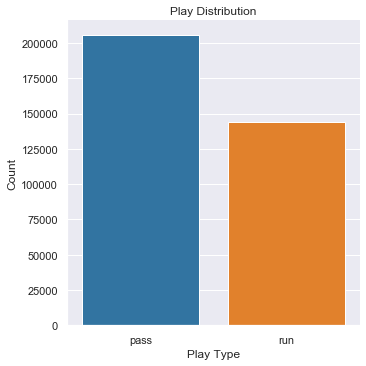

In [7]:
sns.catplot(x='play_type',kind = 'count', data = raw_data)
plt.title('Play Distribution')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.show()

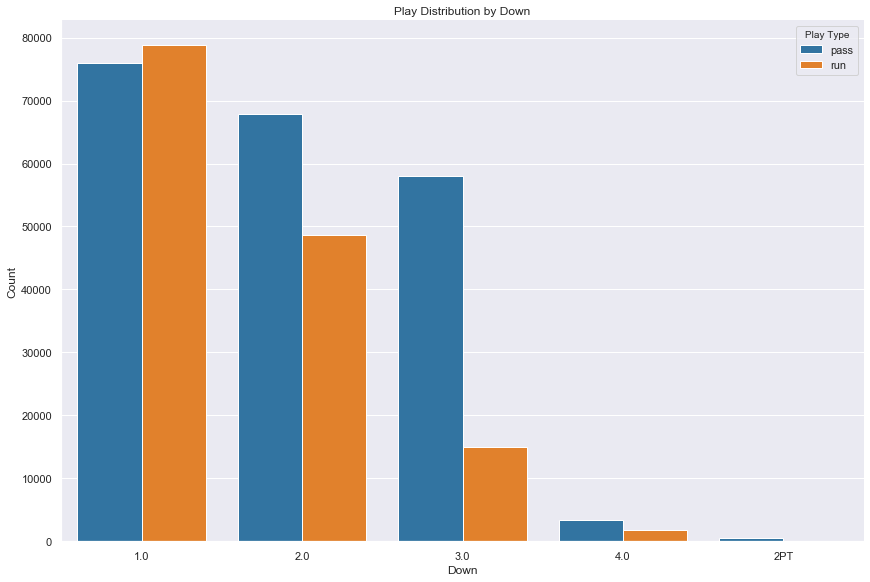

In [8]:
a = sns.catplot(x='down',hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5,legend = False)
plt.title('Play Distribution by Down')
plt.xlabel('Down')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

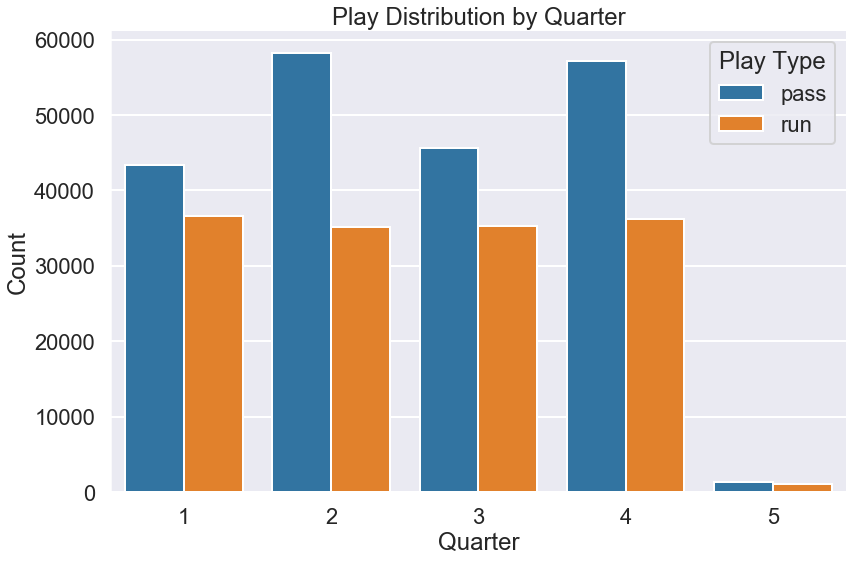

In [443]:
a = sns.catplot(x='qtr',hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5,legend = False)
plt.title('Play Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

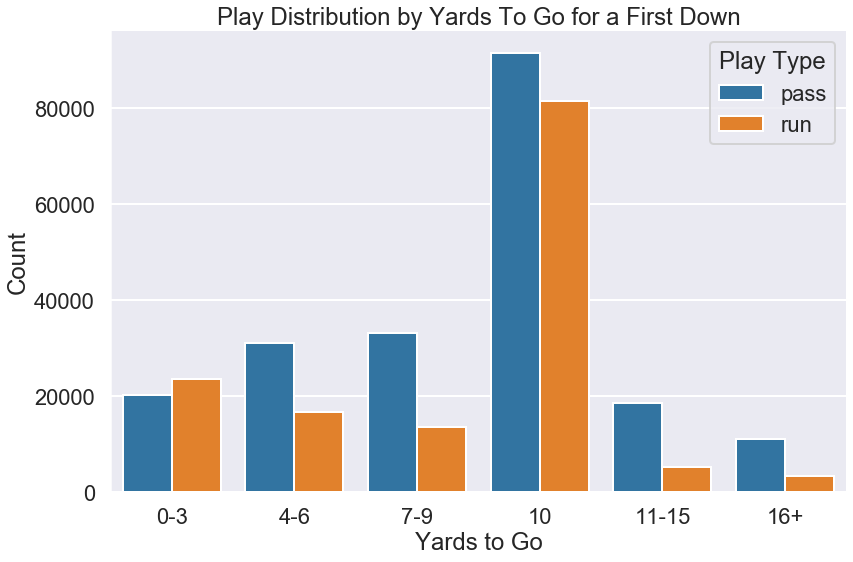

In [444]:
sns.catplot(x='yards_for_first_down', hue = 'play_type',kind = 'count', 
            data = raw_data, height = 8, aspect = 1.5, legend = False,
           order = ['0-3','4-6','7-9','10','11-15','16+'])
plt.title('Play Distribution by Yards To Go for a First Down')
plt.xlabel('Yards to Go')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

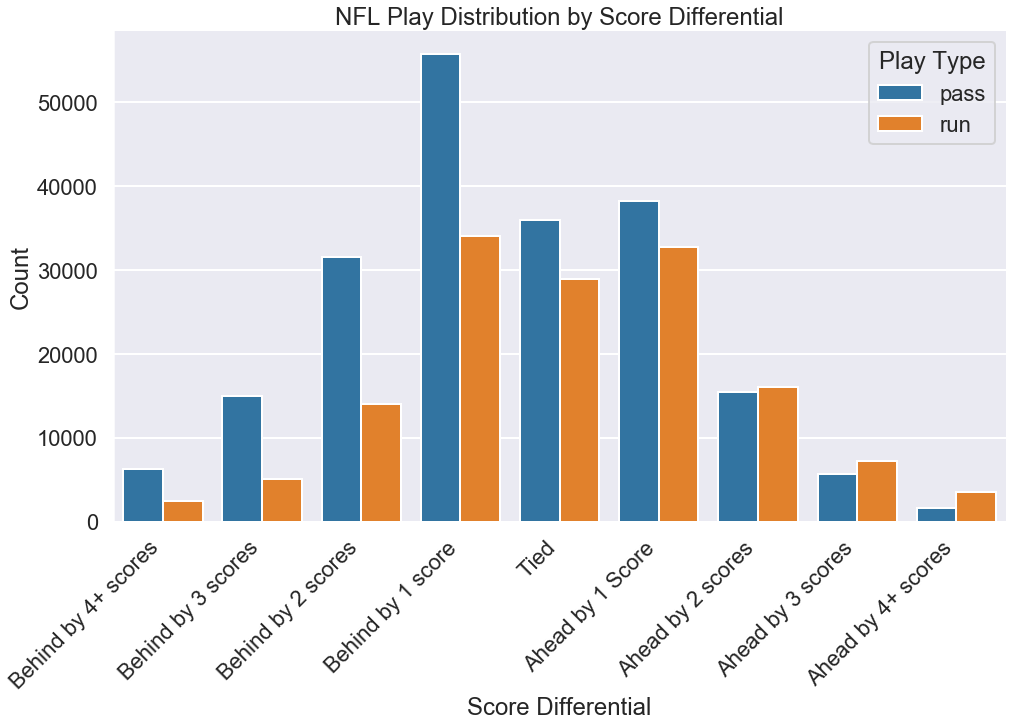

In [282]:
sns.set_context('poster')
#plt.figure(figsize = (8,12))
sns.catplot(x='scor_diff', hue = 'play_type',kind = 'count', data = raw_data, legend = False,
           order = ['behind_by_four_plus_scores','behind_by_three_scores',
                        'behind_by_two_scores', 'behind_by_one_score', 'tied',
                        'ahead_by_one_score', 'ahead_by_two_scores',
                        'ahead_by_three_scores', 'ahead_by_four_plus_scores'])
plt.title('NFL Play Distribution by Score Differential')
plt.xlabel('Score Differential')
plt.xticks(np.arange(9),['Behind by 4+ scores','Behind by 3 scores', 'Behind by 2 scores',
                    'Behind by 1 score', 'Tied', 'Ahead by 1 Score', 'Ahead by 2 scores',
                    'Ahead by 3 scores', 'Ahead by 4+ scores'], rotation =45, horizontalalignment='right')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.gcf().set_size_inches(80, 10)
plt.show()

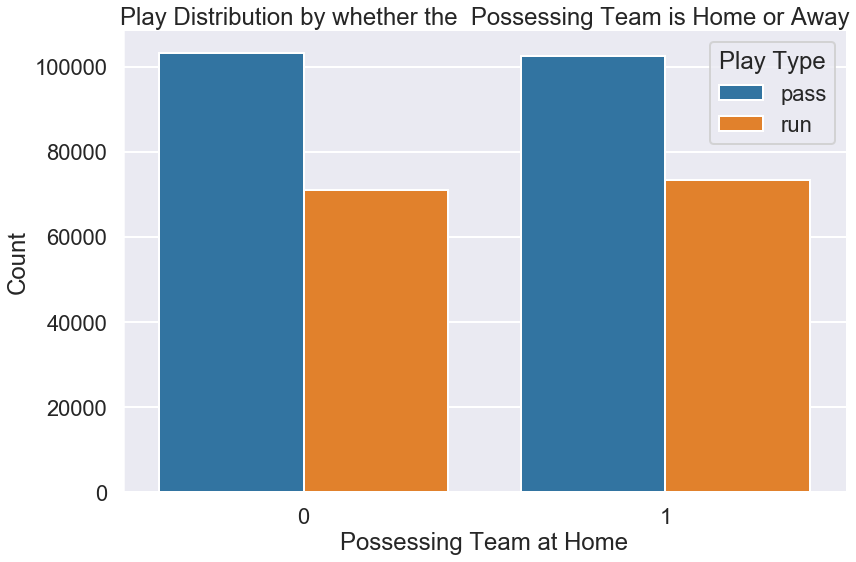

In [445]:
sns.catplot(x='posteam_home', hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5, legend = False)
plt.title('Play Distribution by whether the  Possessing Team is Home or Away')
plt.xlabel('Possessing Team at Home')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

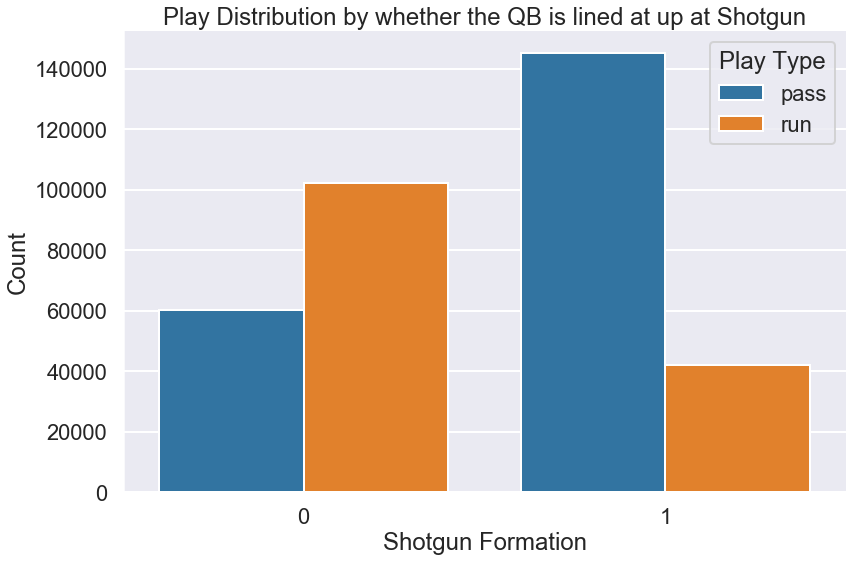

In [446]:
sns.catplot(x='shotgun', hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5, legend = False)
plt.title('Play Distribution by whether the QB is lined at up at Shotgun')
plt.xlabel('Shotgun Formation')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

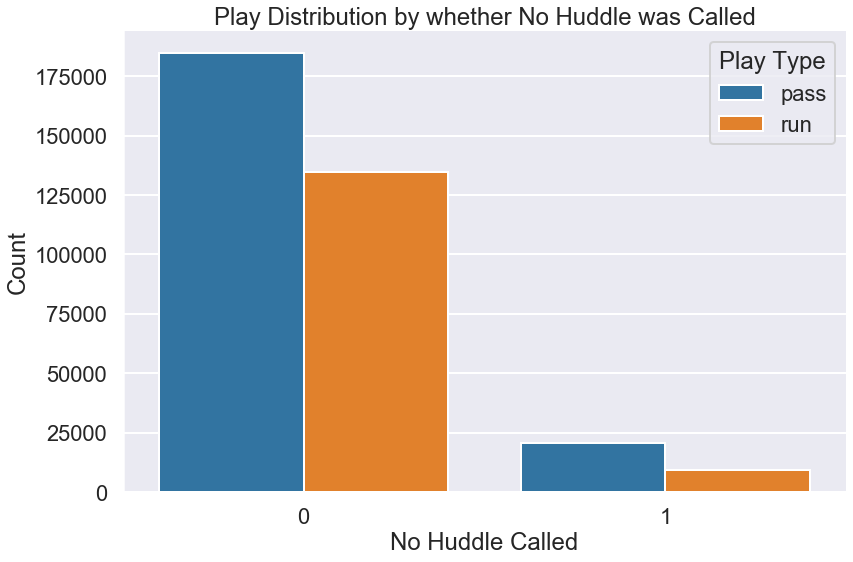

In [447]:
sns.catplot(x='no_huddle', hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5, legend = False)
plt.title('Play Distribution by whether No Huddle was Called')
plt.xlabel('No Huddle Called')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

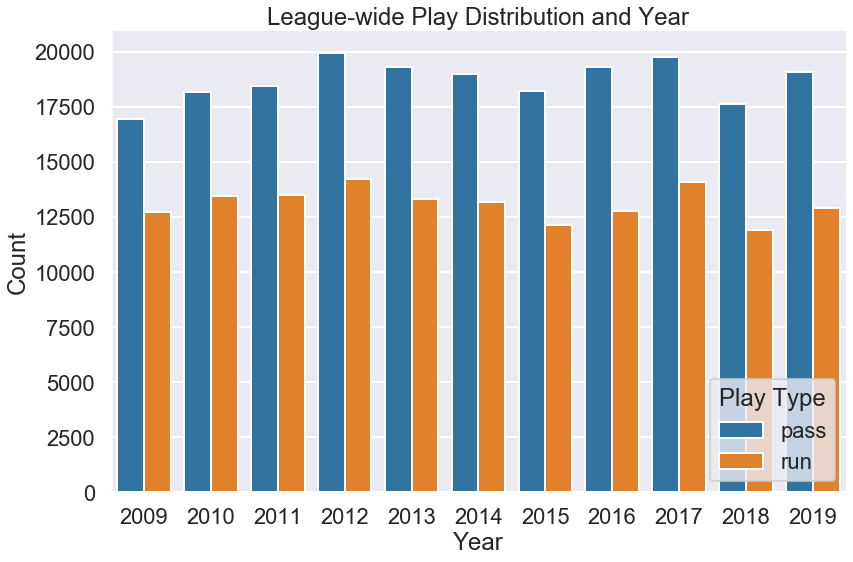

In [440]:
sns.set_context('poster')
sns.catplot(x='year', hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5, legend = False)
plt.title('League-wide Play Distribution and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'lower right')
plt.show()

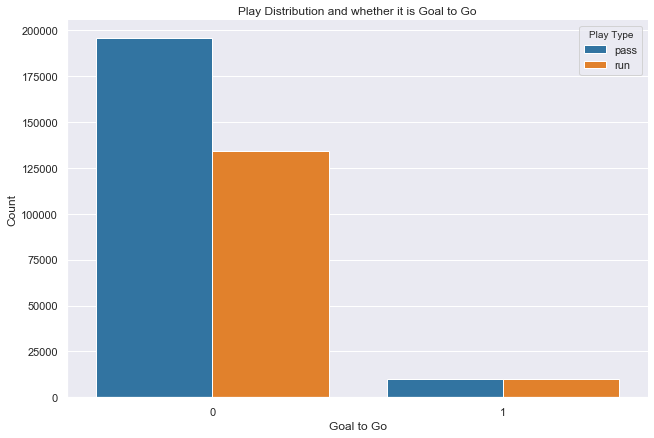

In [14]:
sns.catplot(x='goal_to_go', hue = 'play_type',kind = 'count', data = raw_data, height = 6, aspect = 1.5, legend = False)
plt.title('Play Distribution and whether it is Goal to Go')
plt.xlabel('Goal to Go')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

# Team Based Visualizations

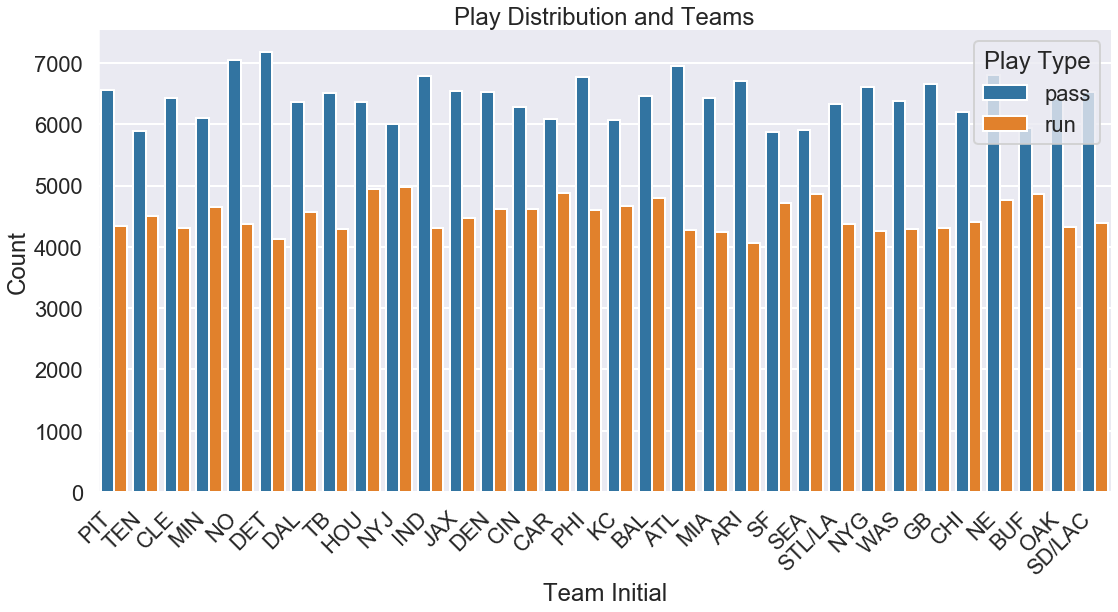

In [441]:
sns.set_context('poster')
sns.catplot(x='posteam', hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 2, legend = False)
plt.title('Play Distribution and Teams')
plt.xlabel('Team Initial')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.xticks(rotation =45, horizontalalignment='right')
plt.show()

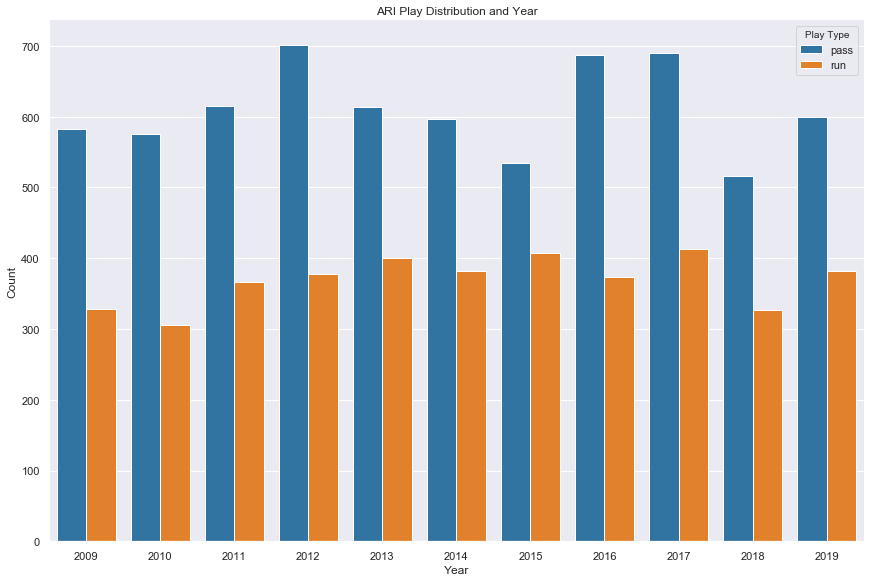

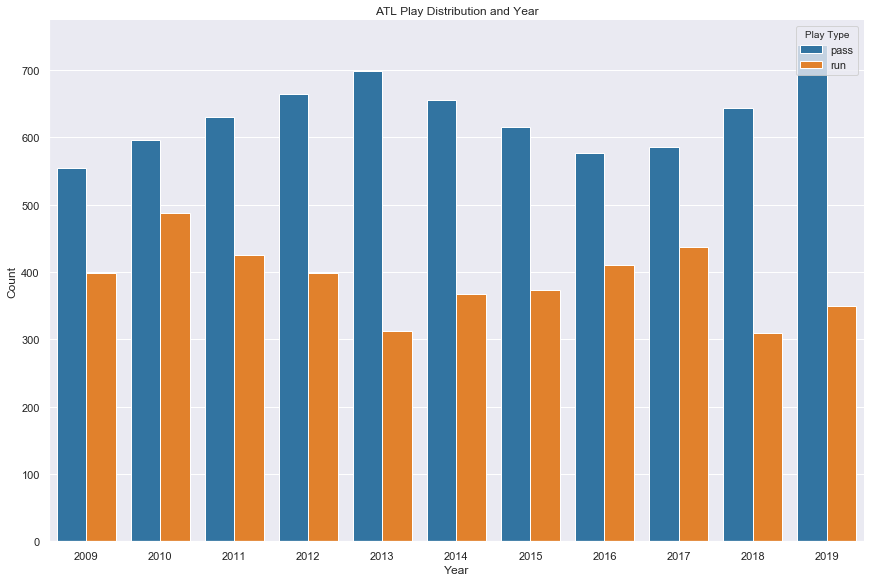

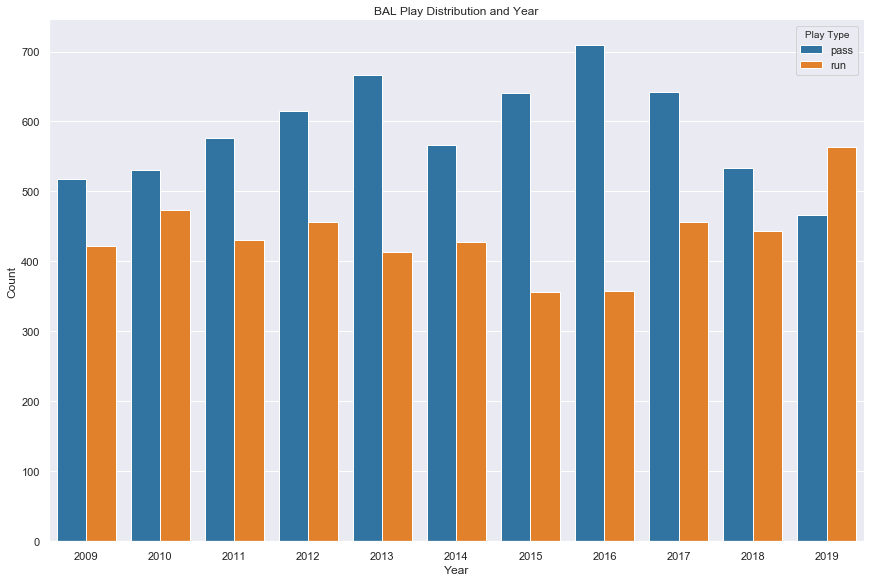

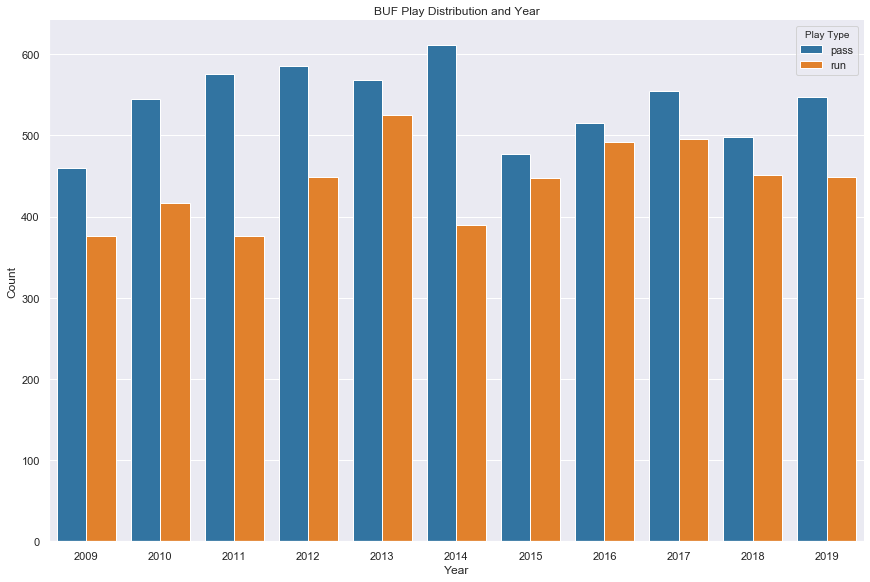

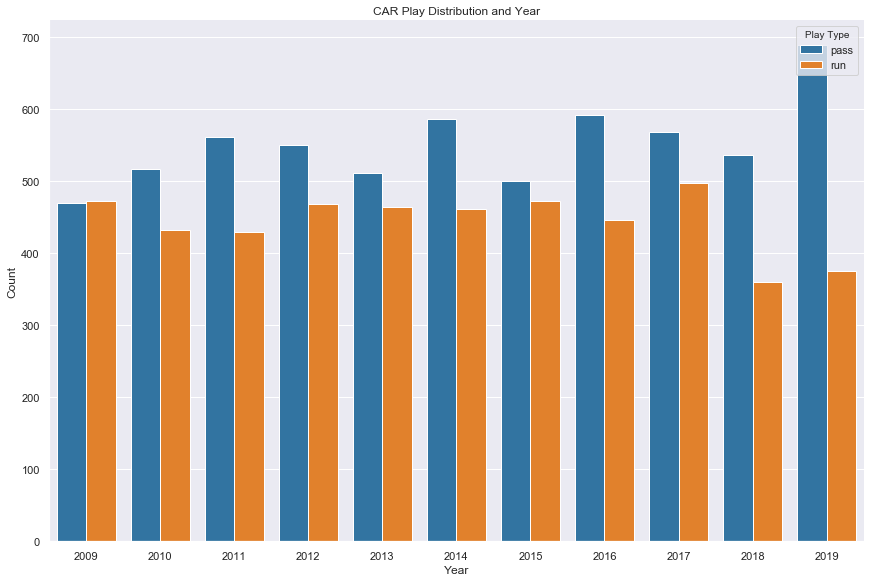

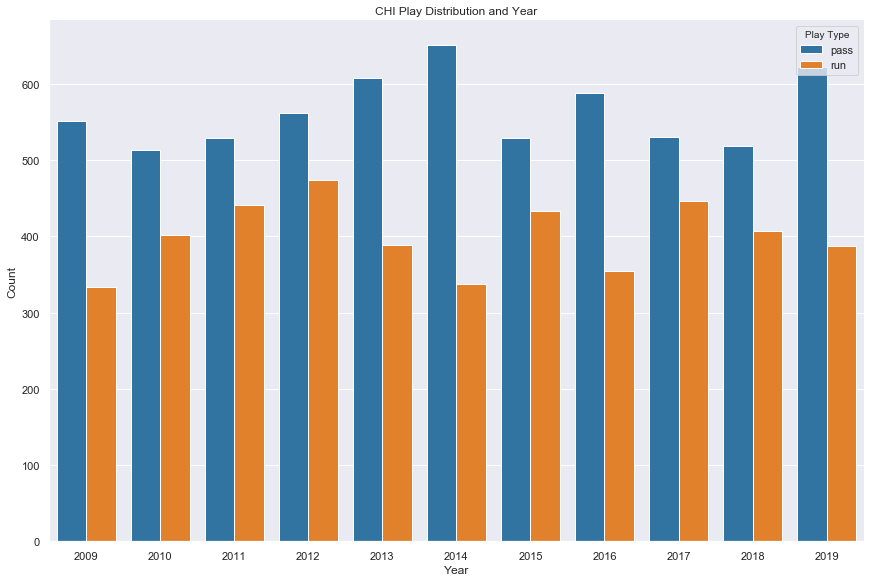

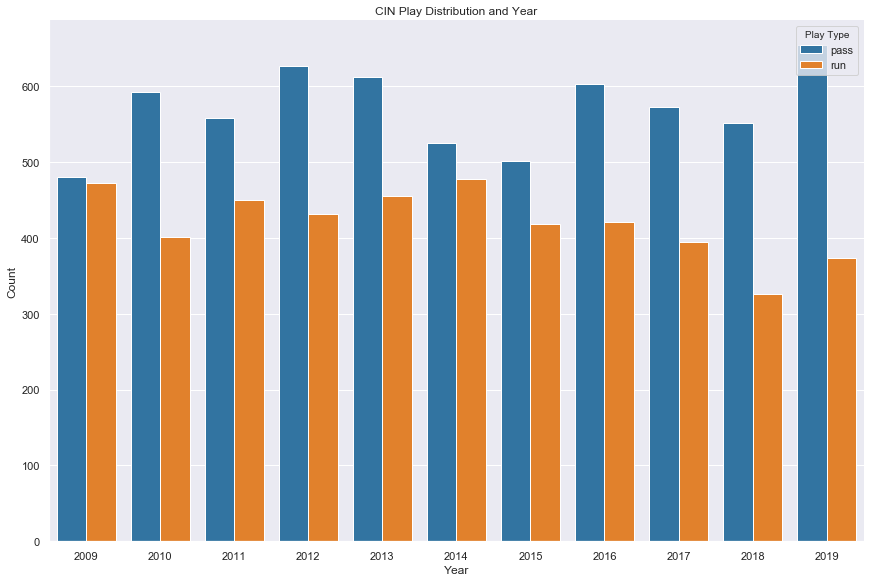

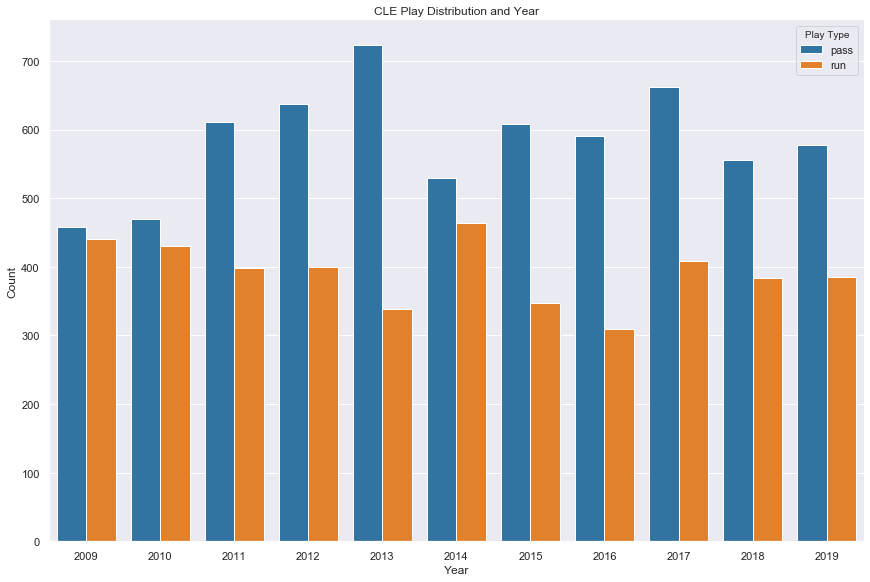

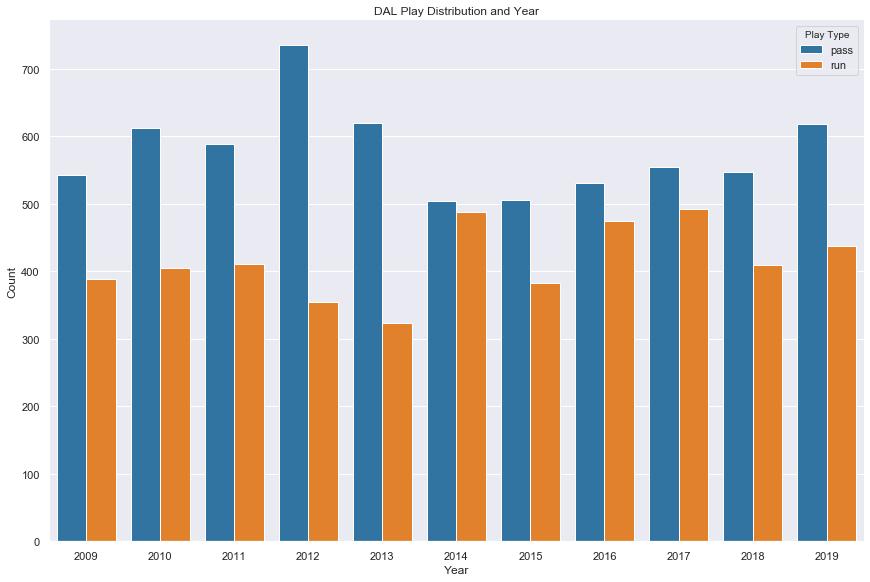

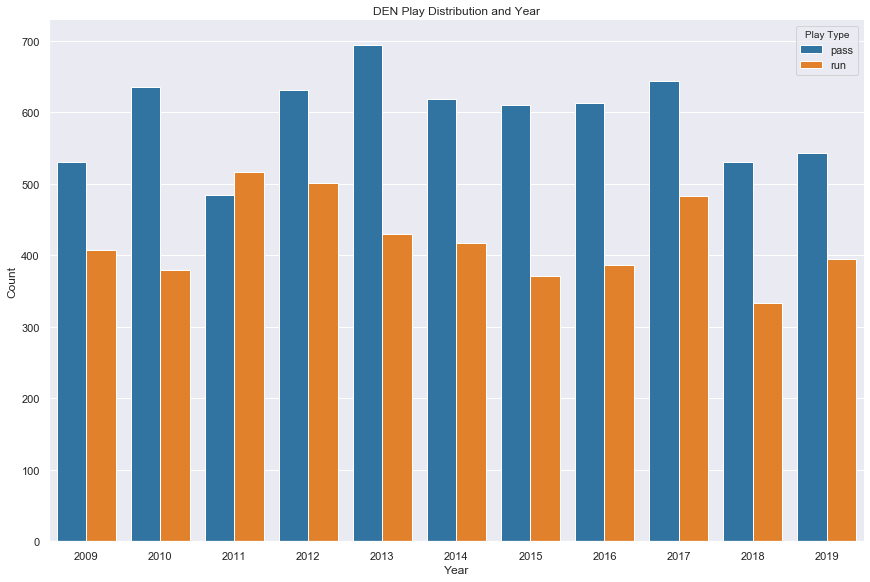

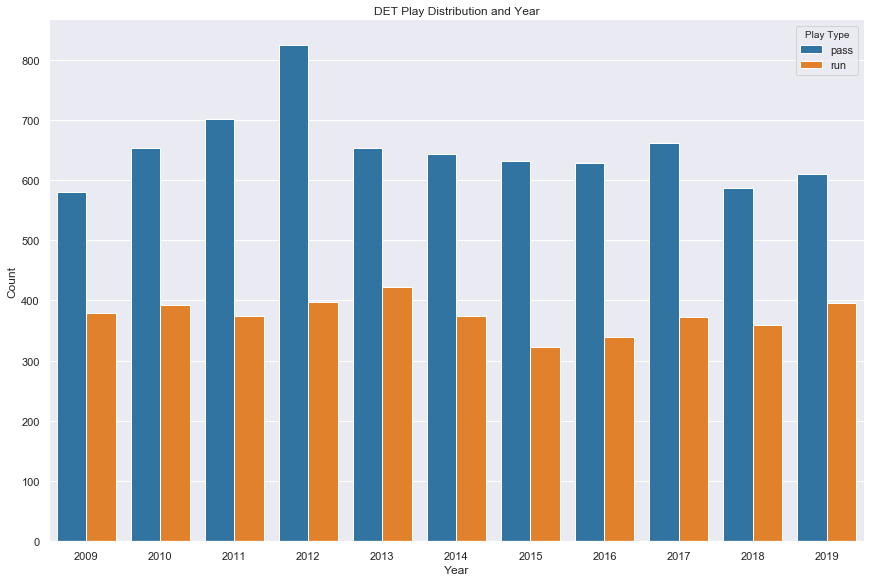

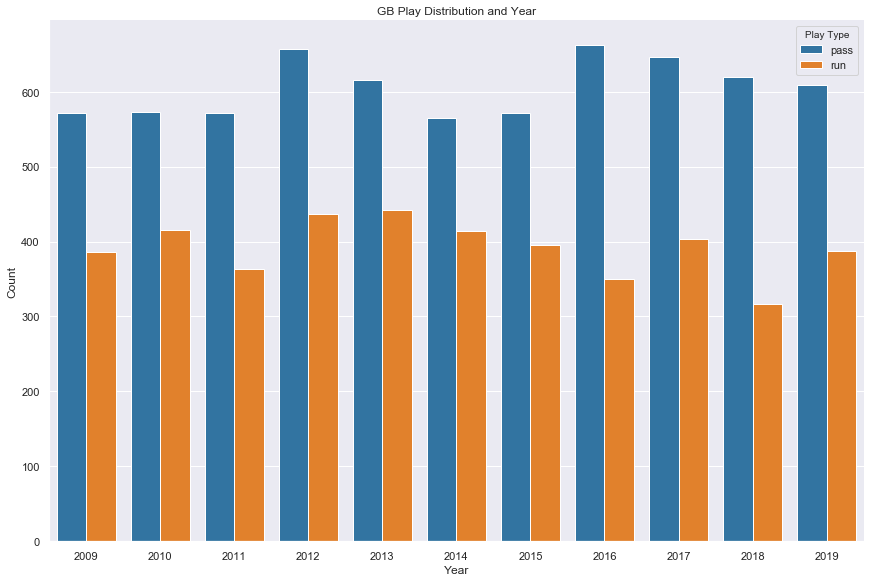

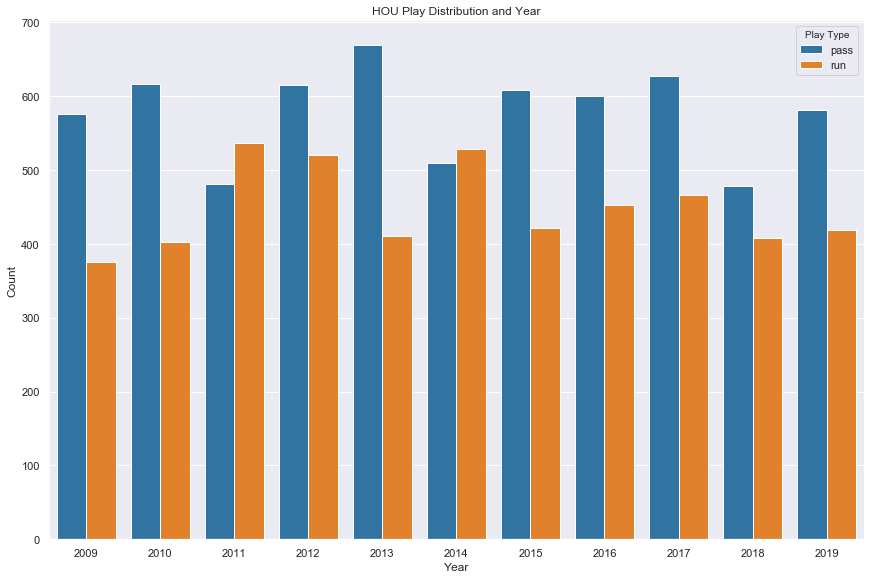

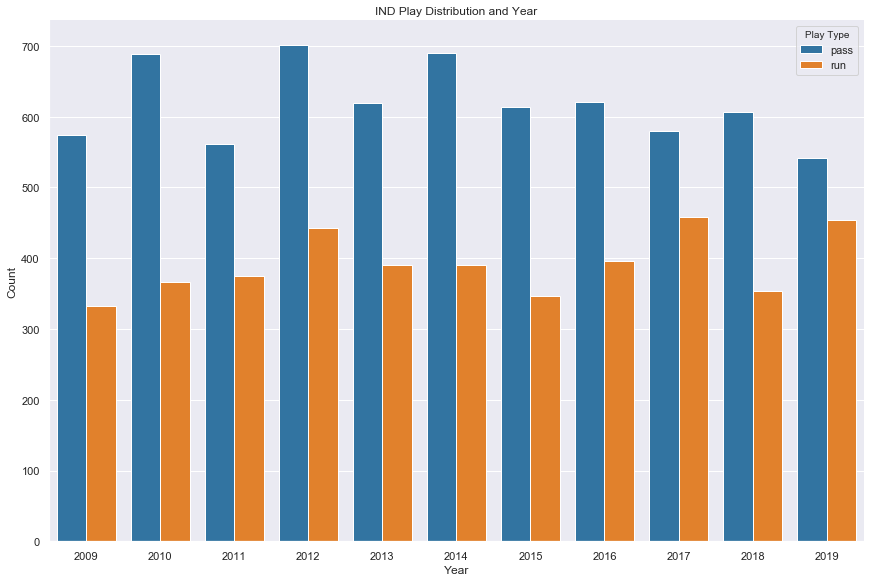

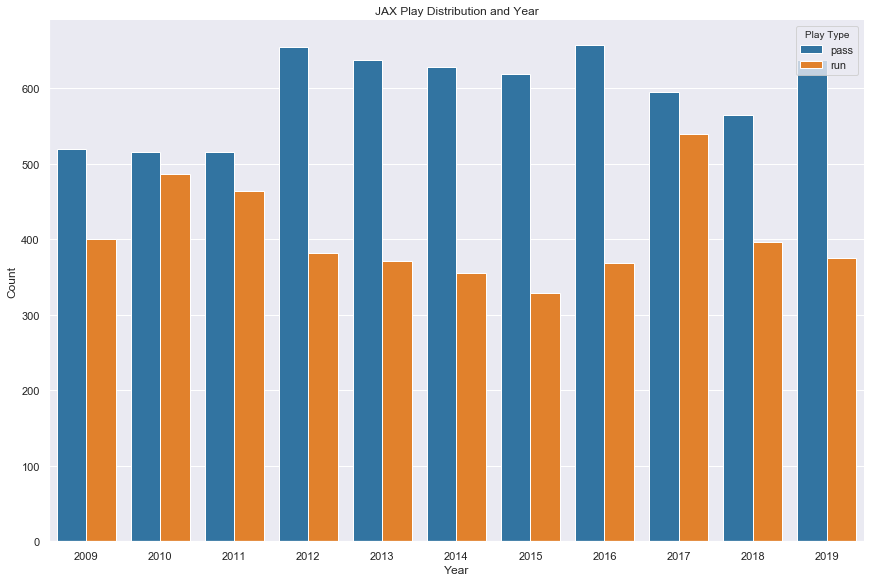

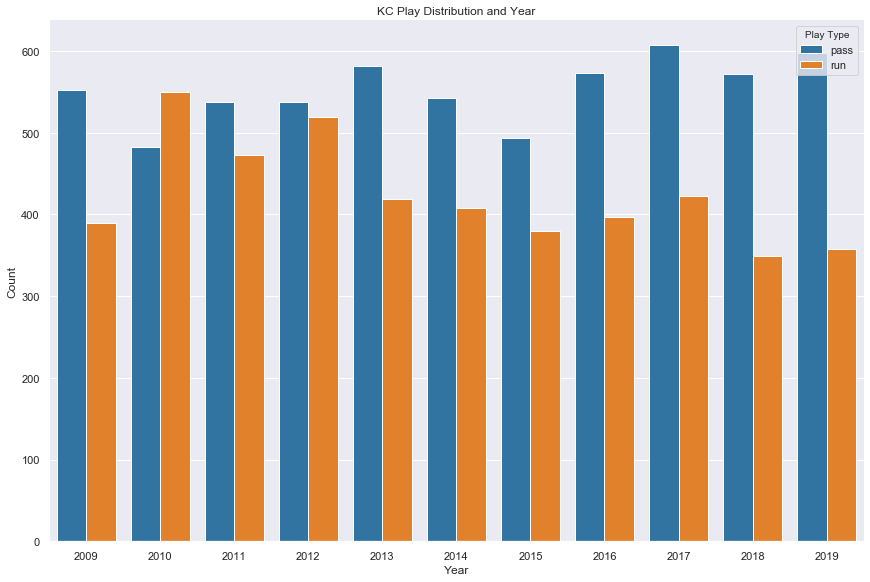

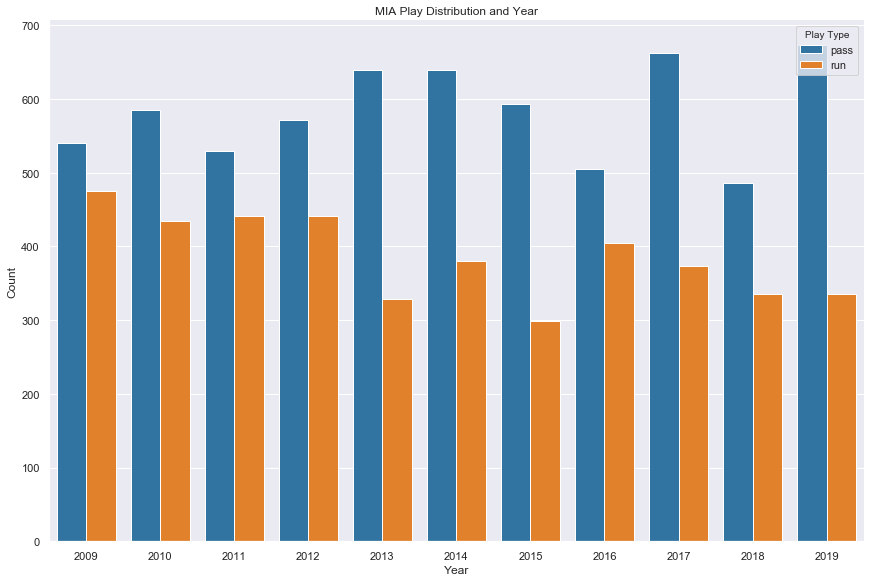

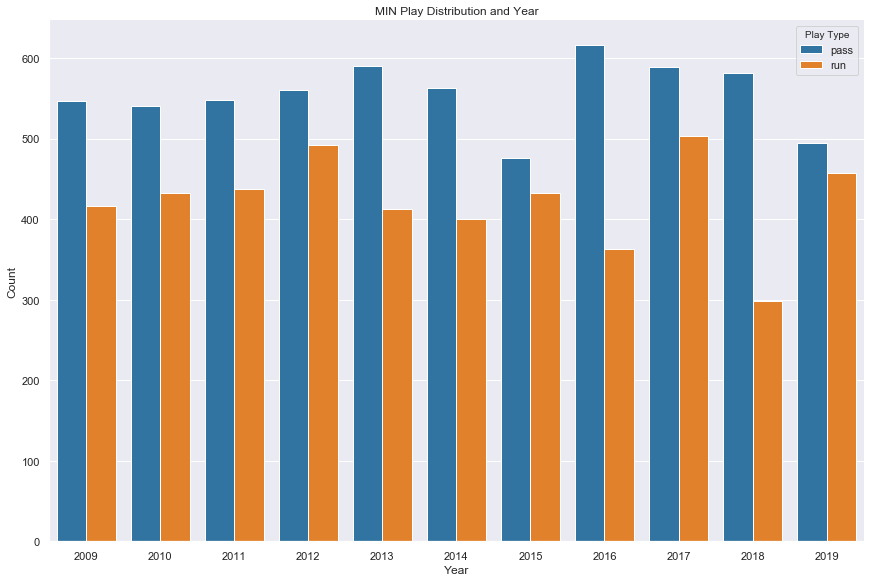

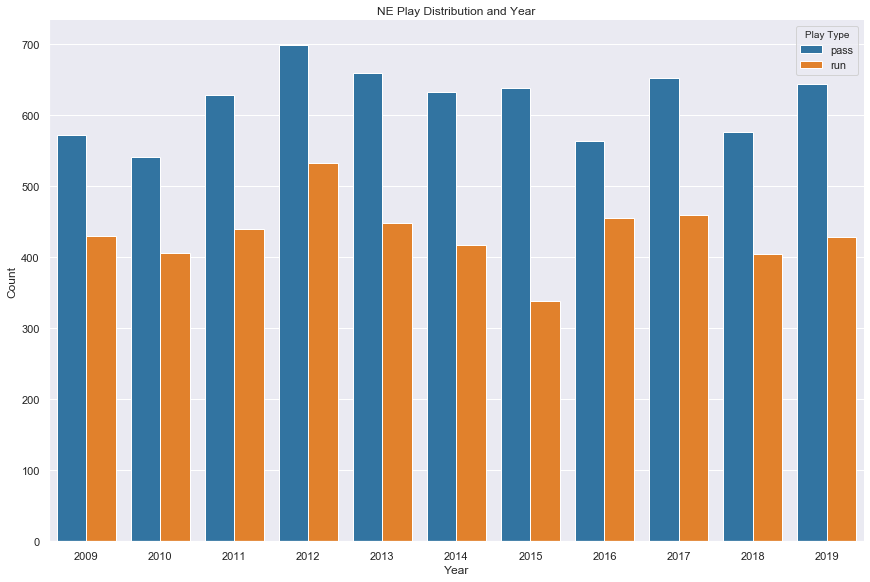

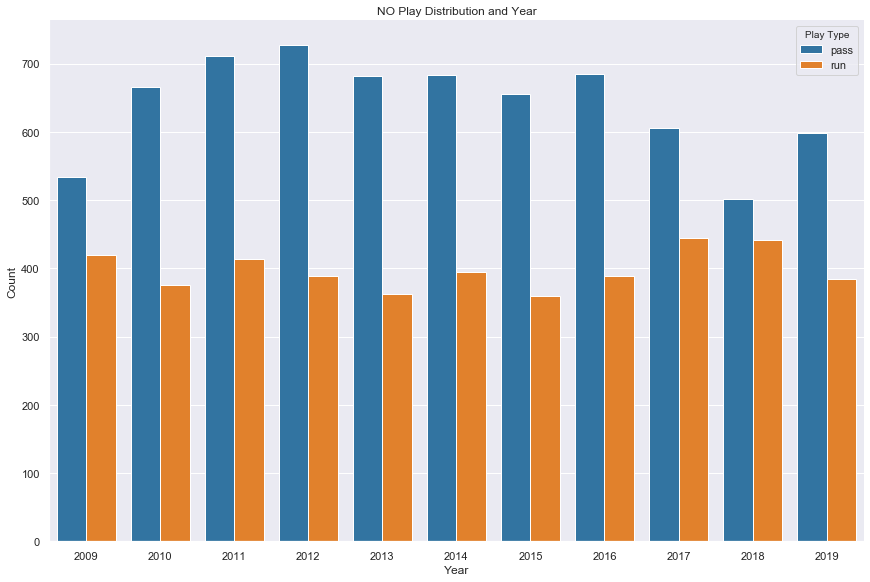

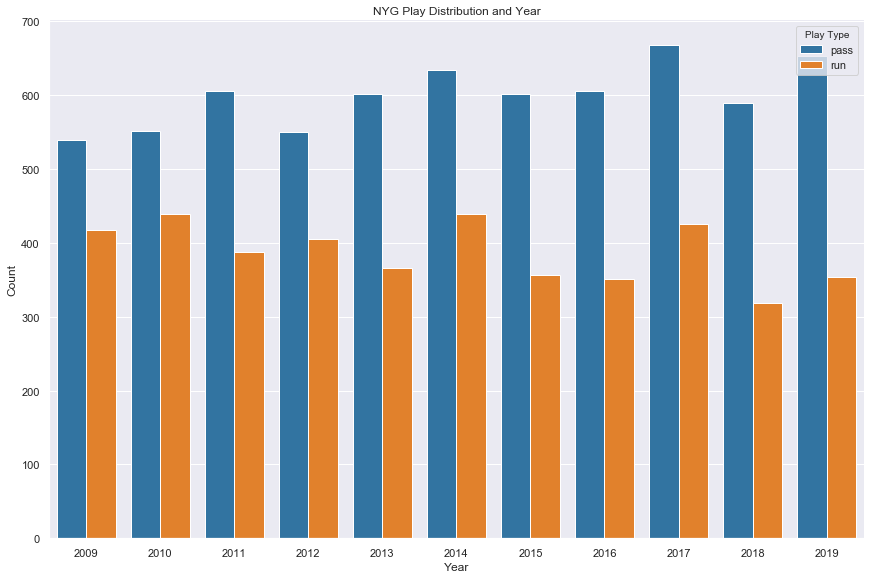

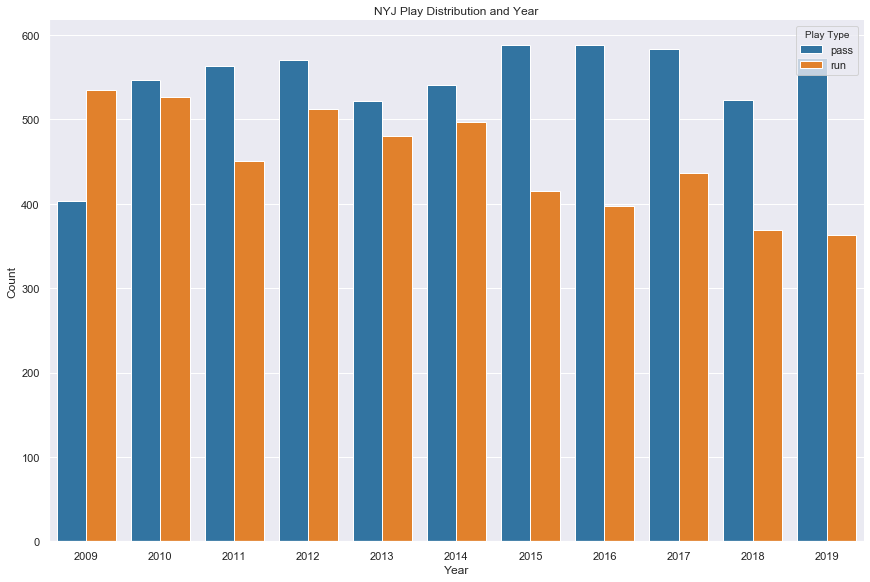

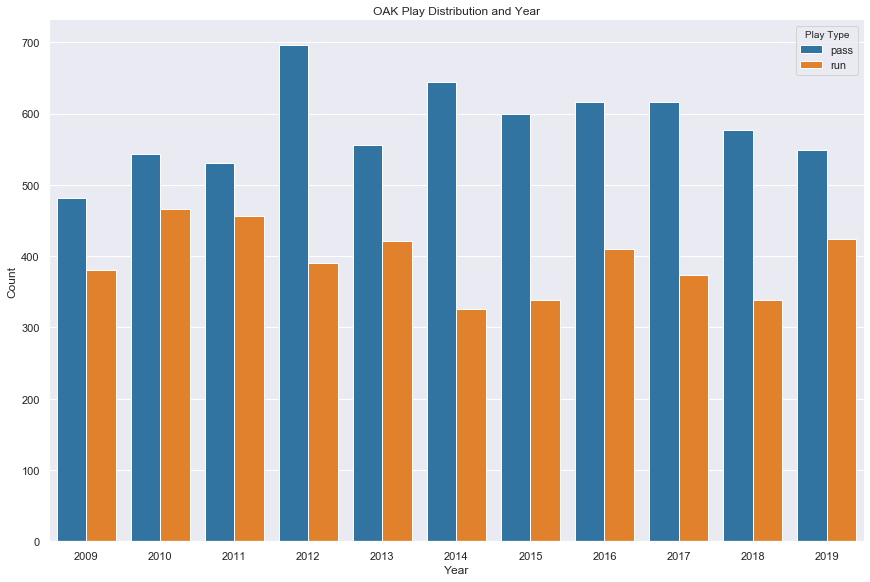

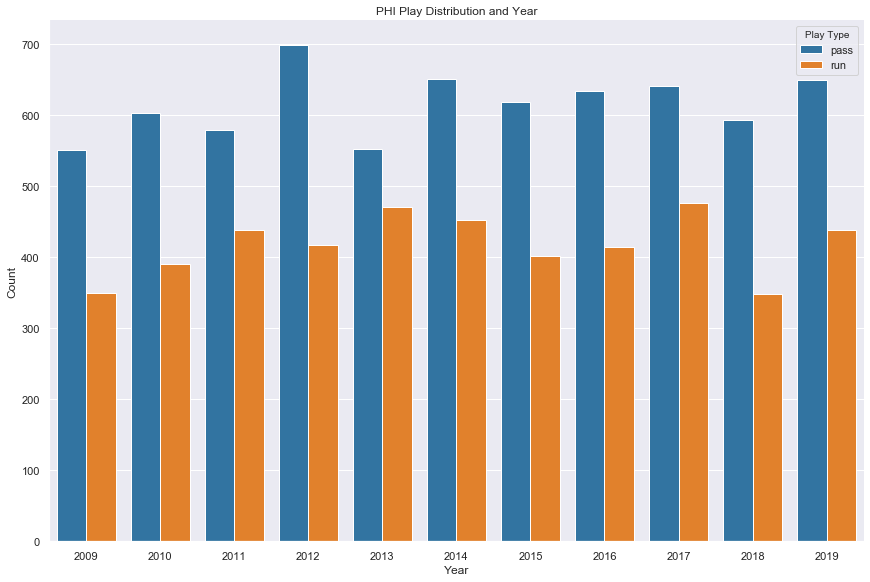

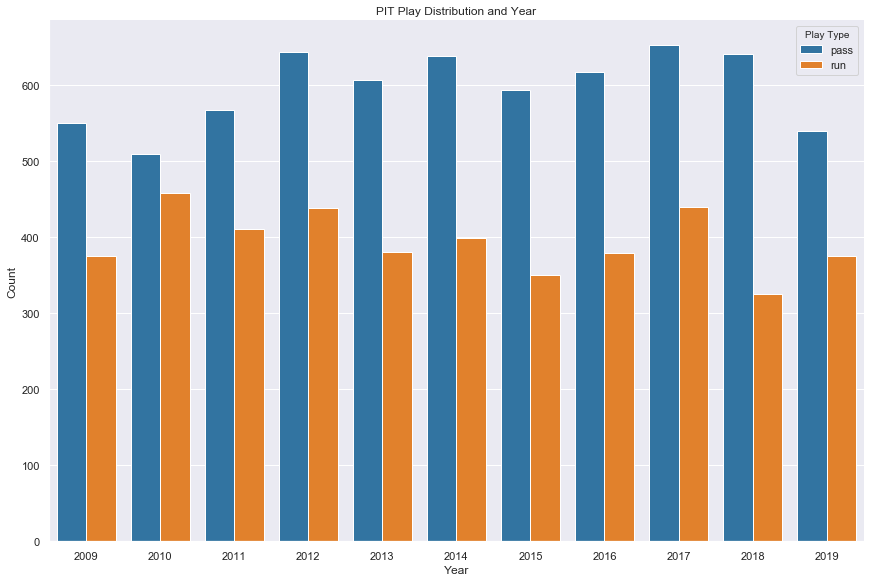

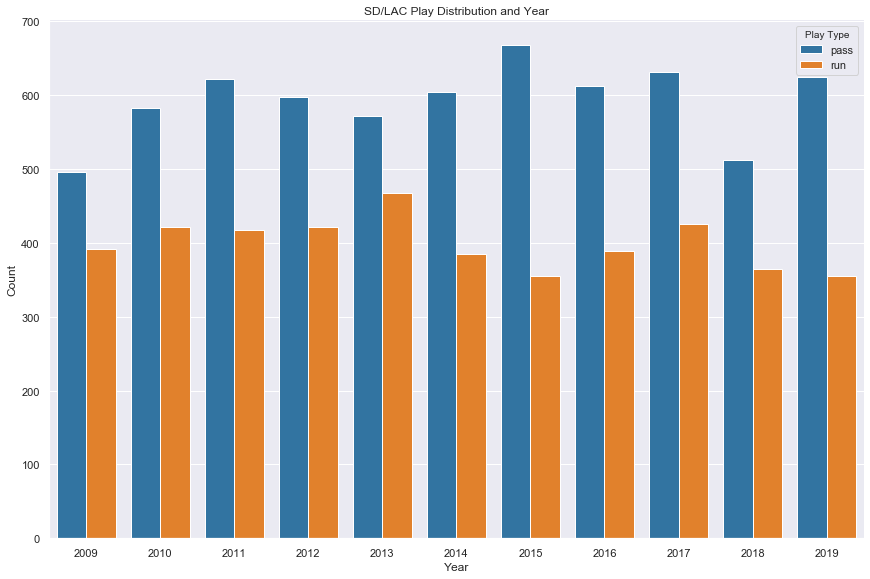

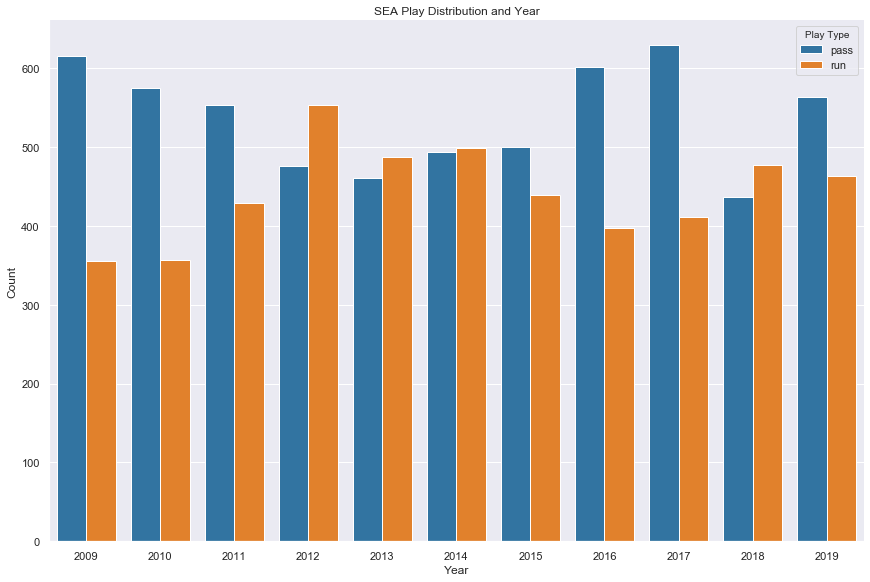

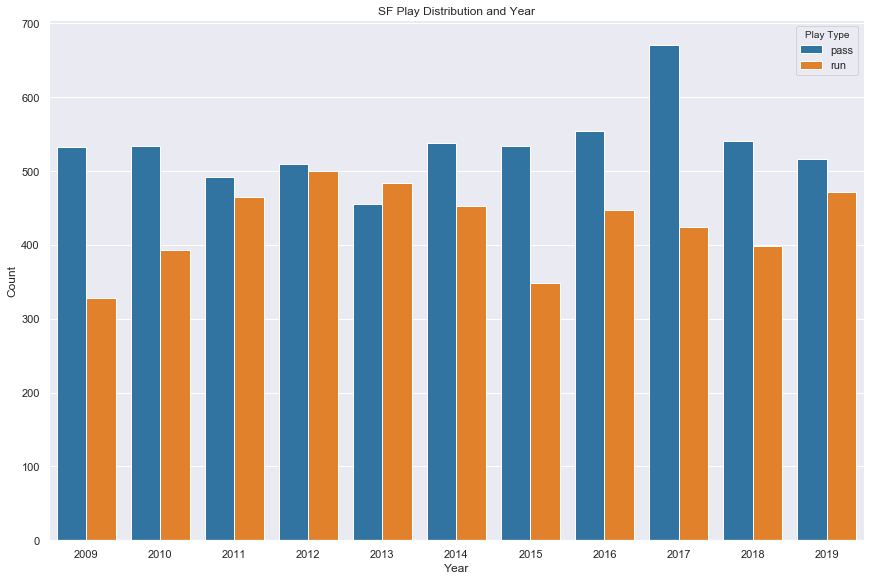

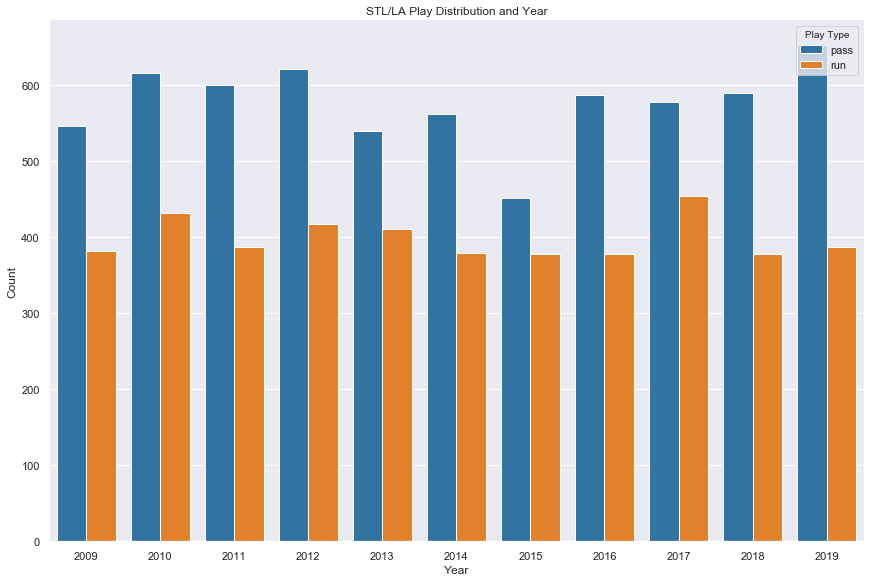

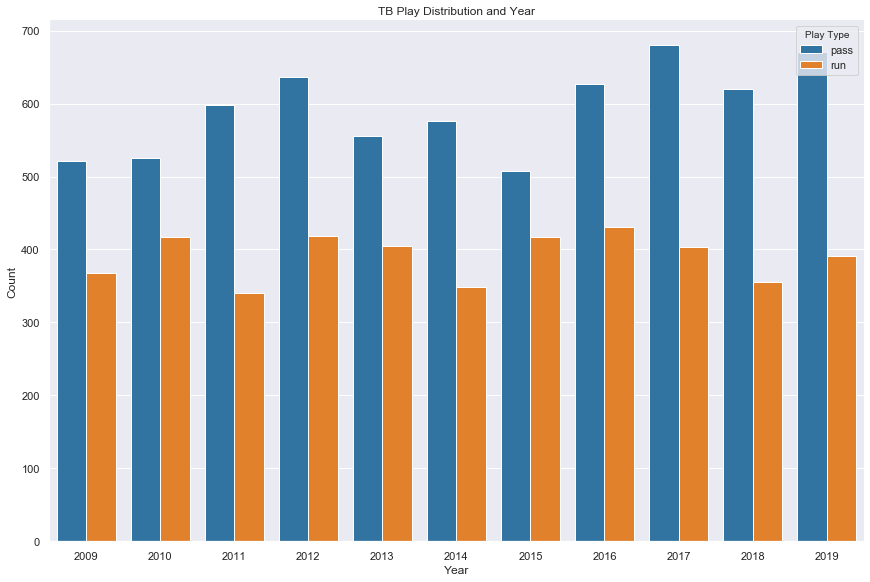

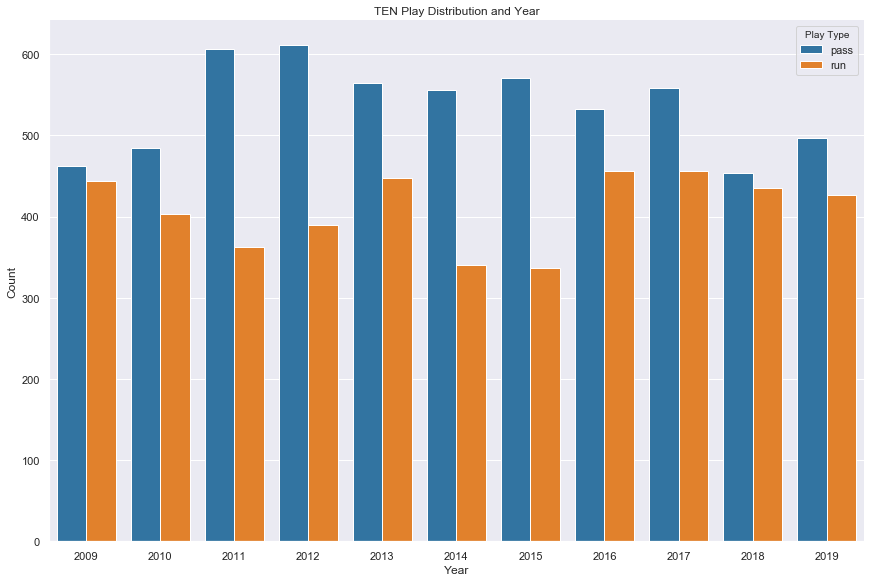

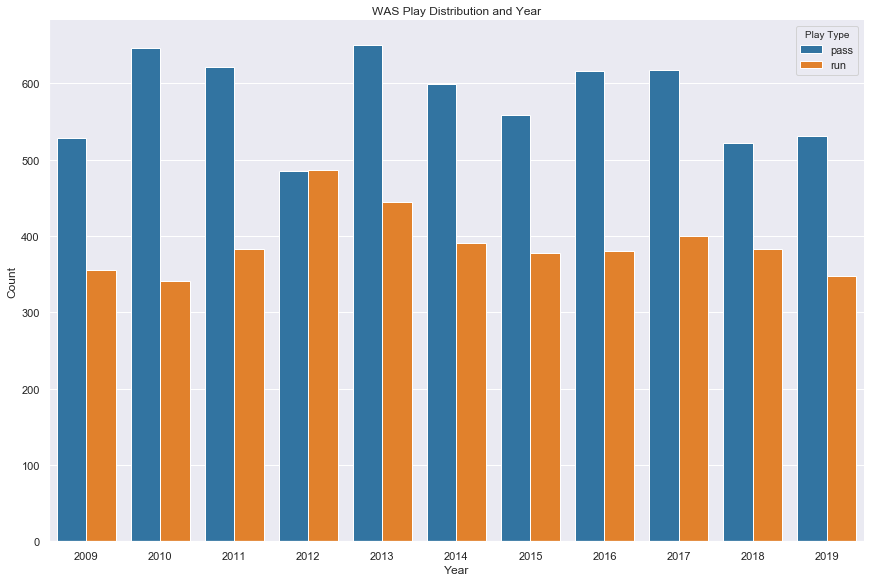

In [17]:
teams = raw_data.posteam.unique()
teams.sort()
for team in teams:
    data = raw_data[raw_data.posteam == team]
    sns.catplot(x='year', hue = 'play_type',kind = 'count', hue_order = ['pass','run'], data = data, height = 8, aspect = 1.5, legend = False)
    plt.title(team +' Play Distribution and Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
    plt.show()

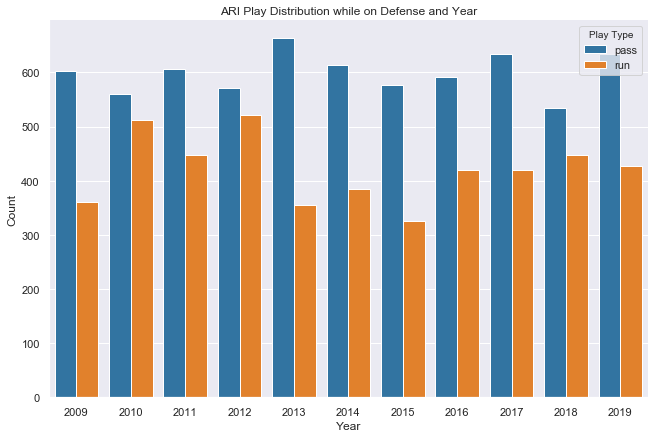

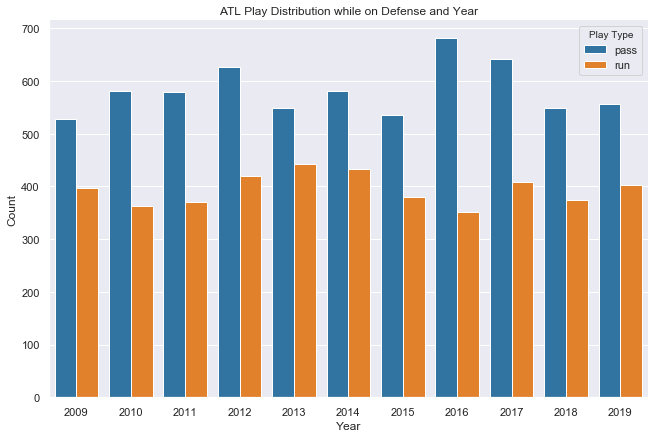

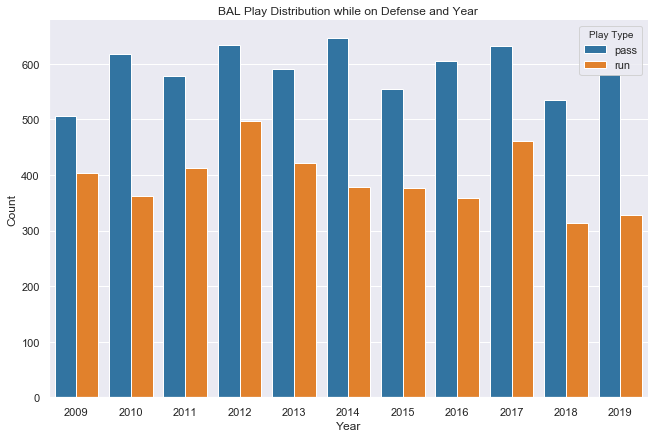

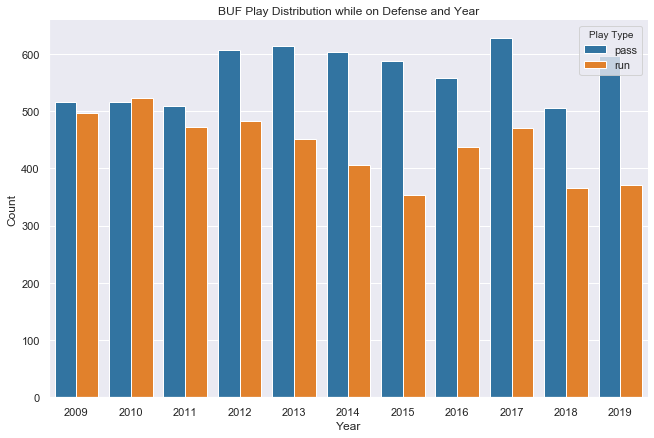

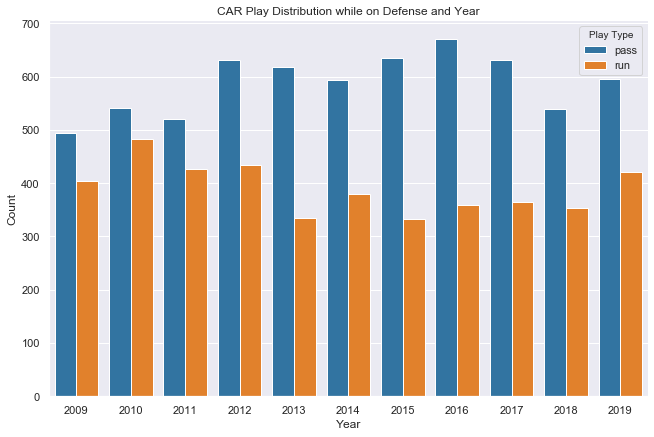

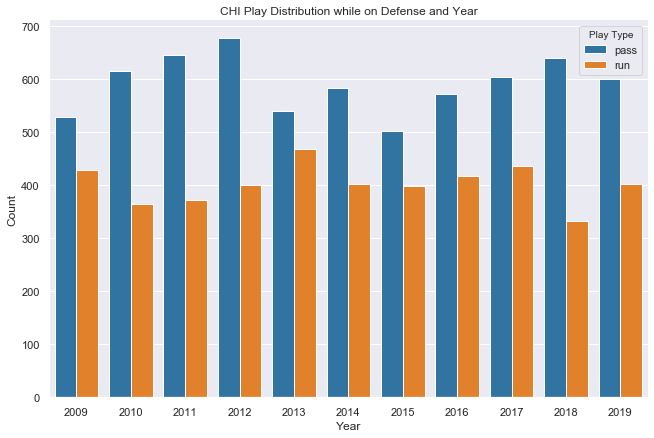

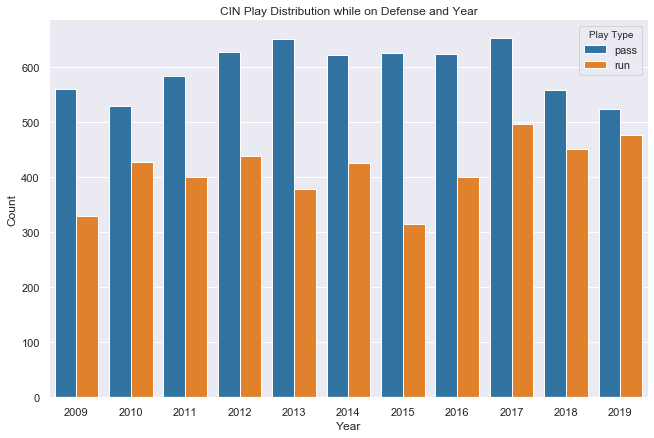

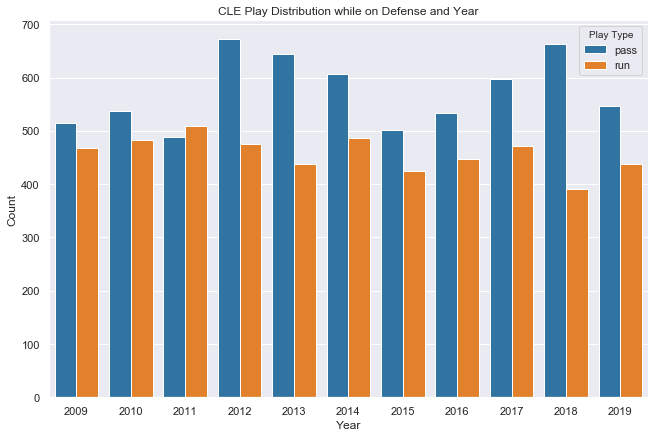

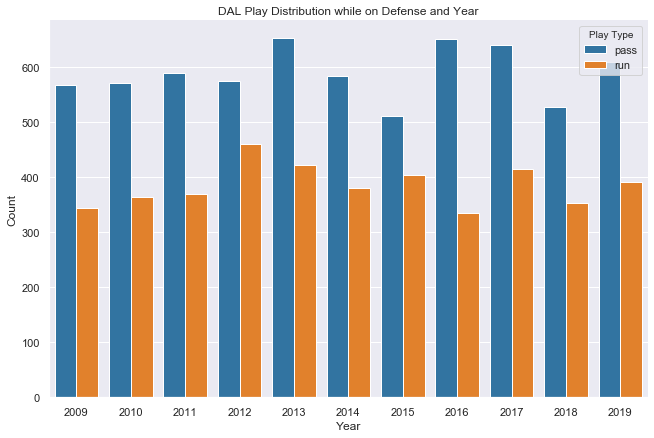

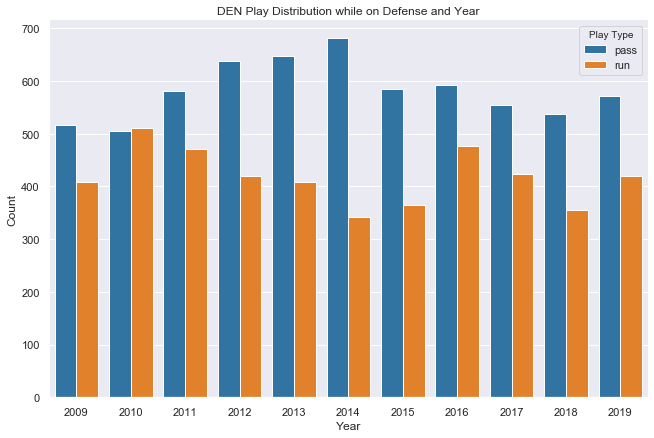

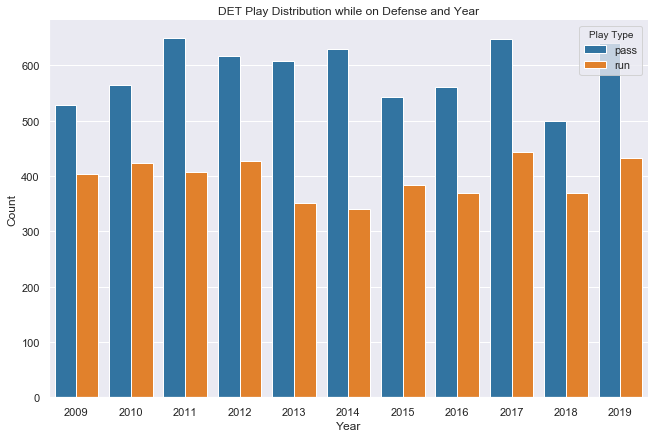

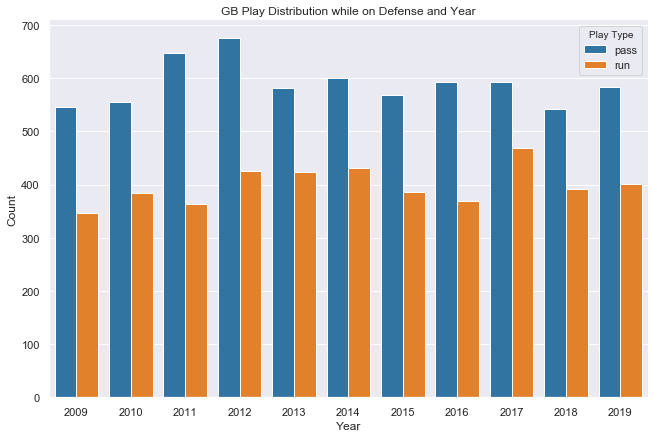

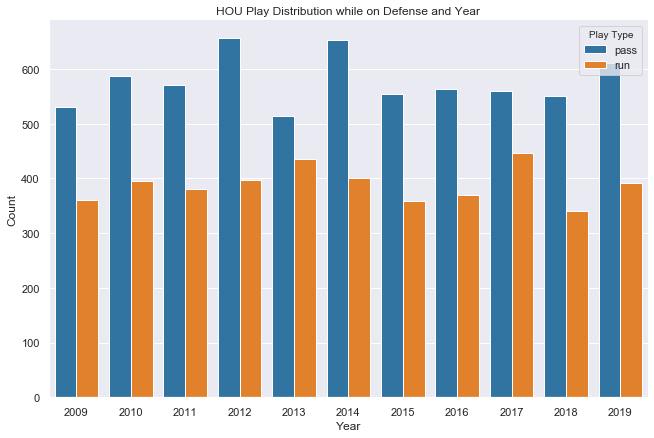

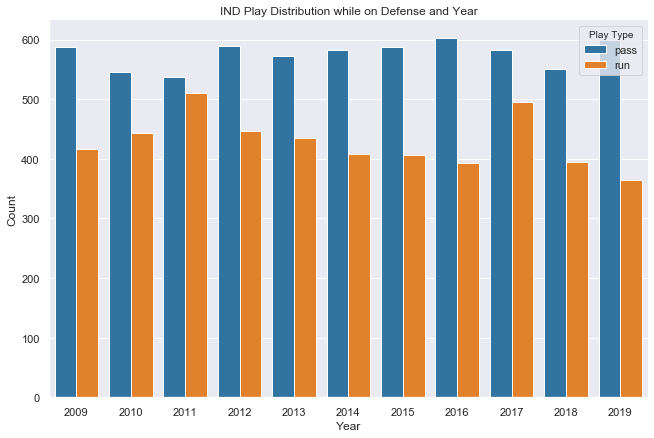

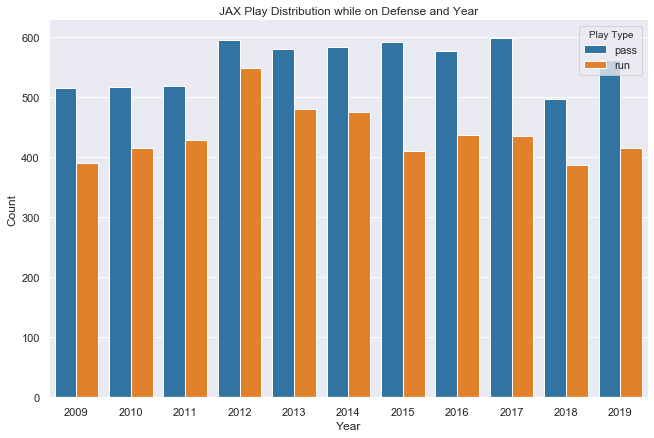

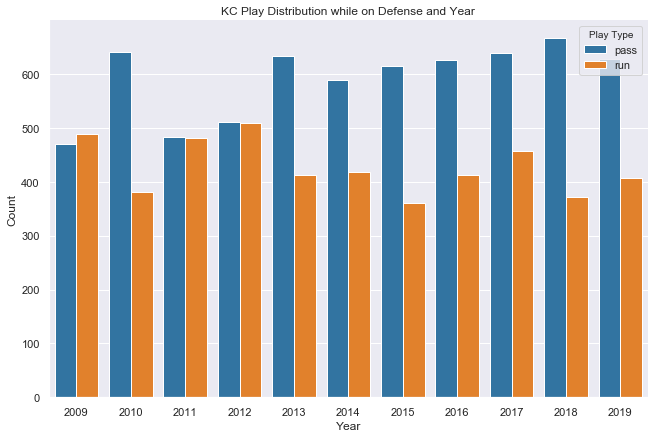

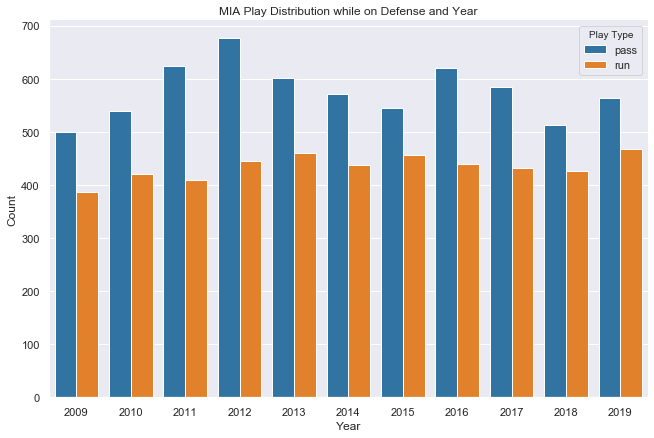

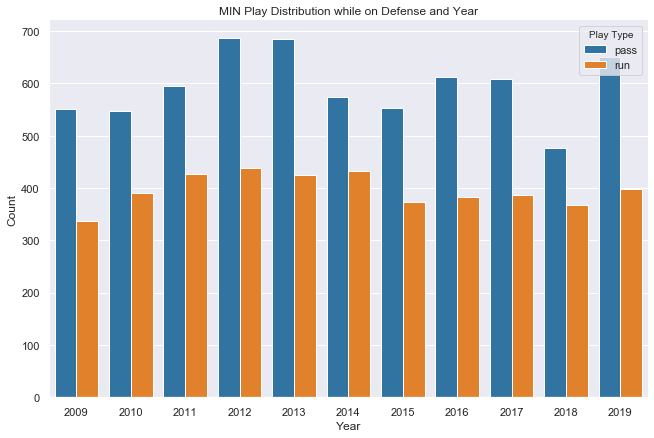

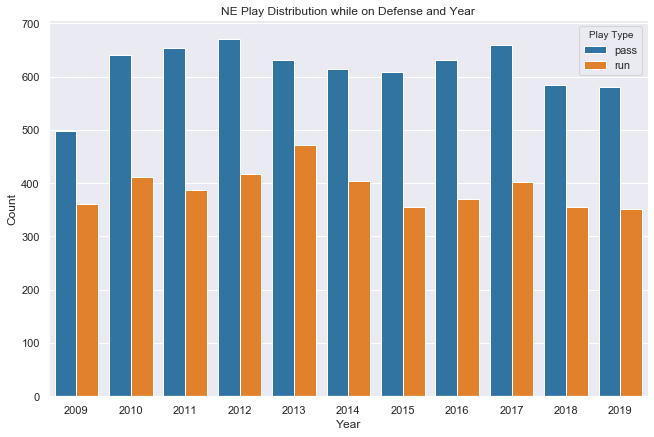

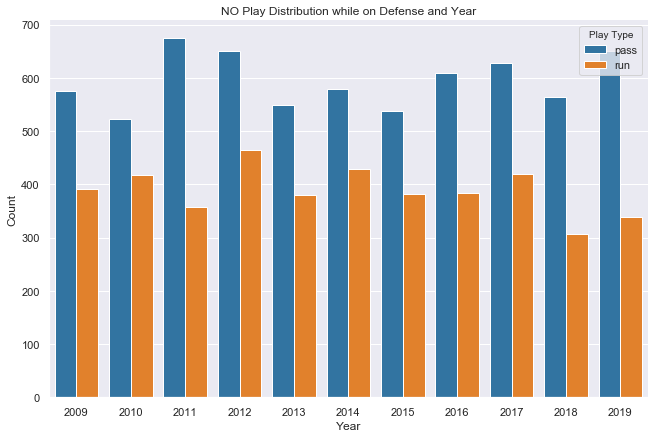

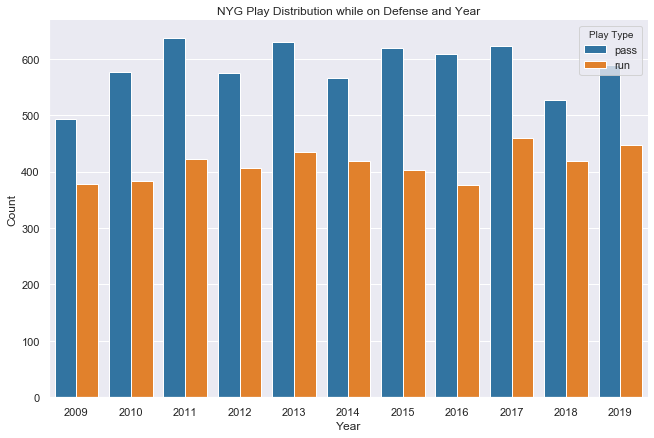

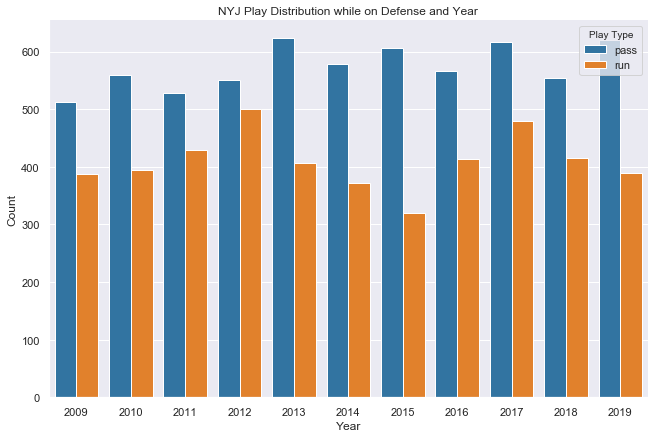

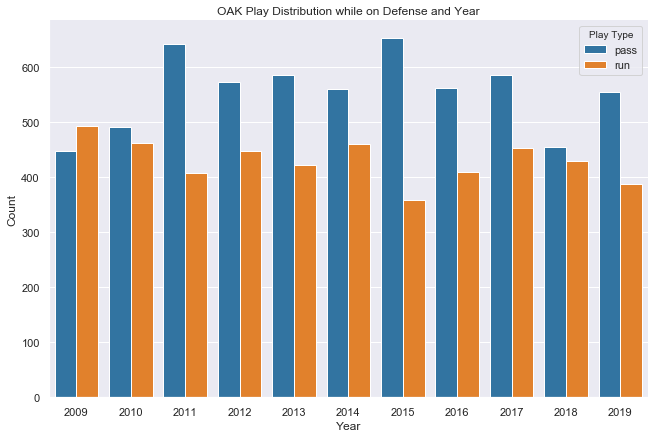

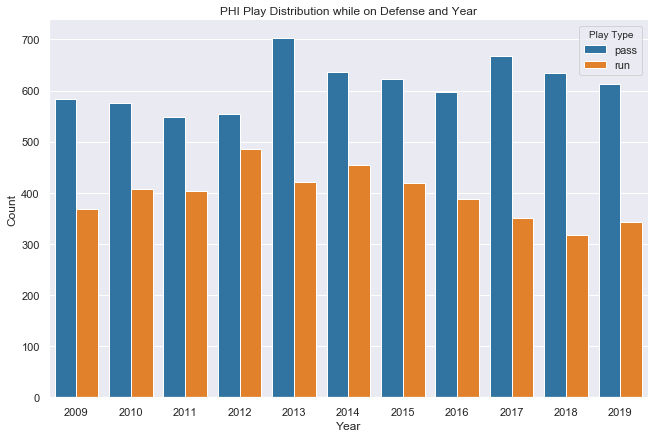

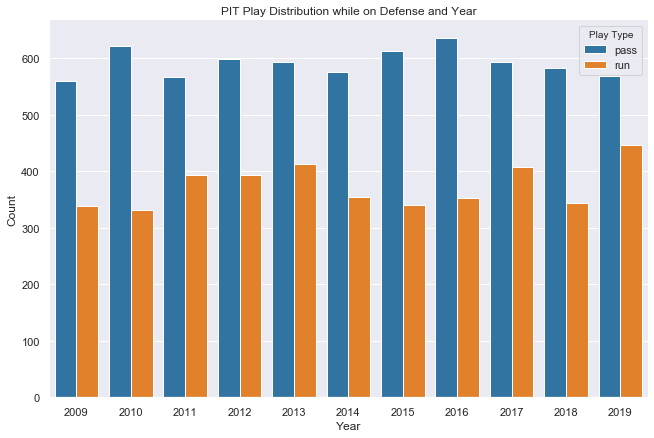

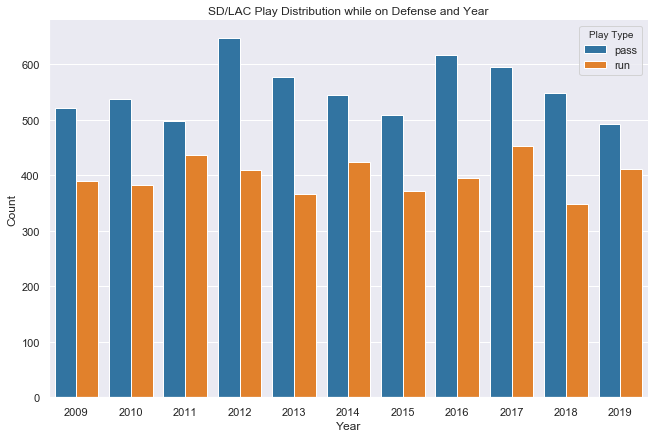

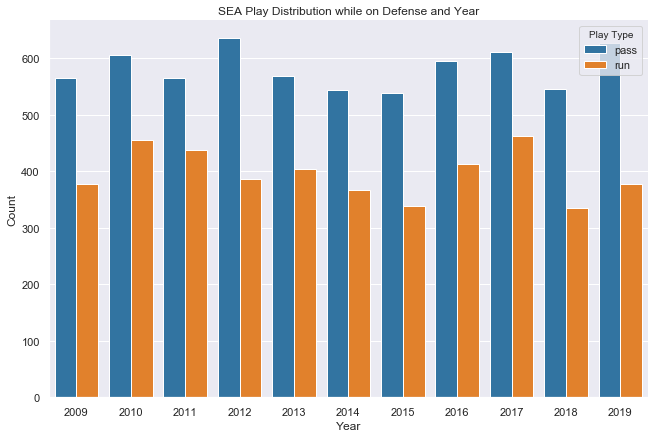

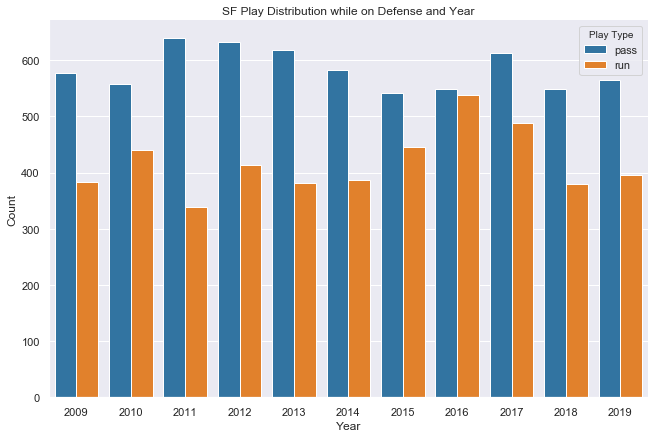

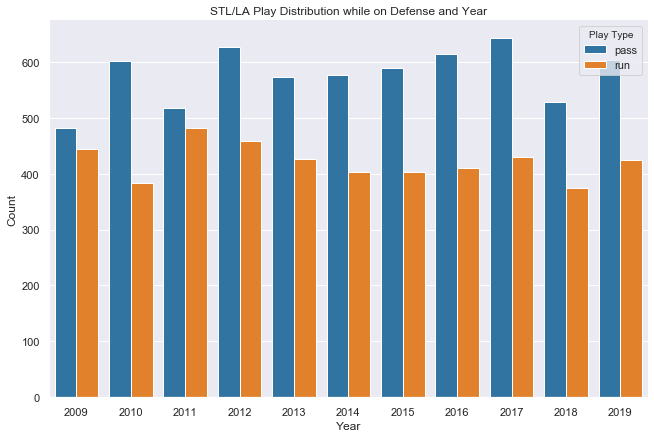

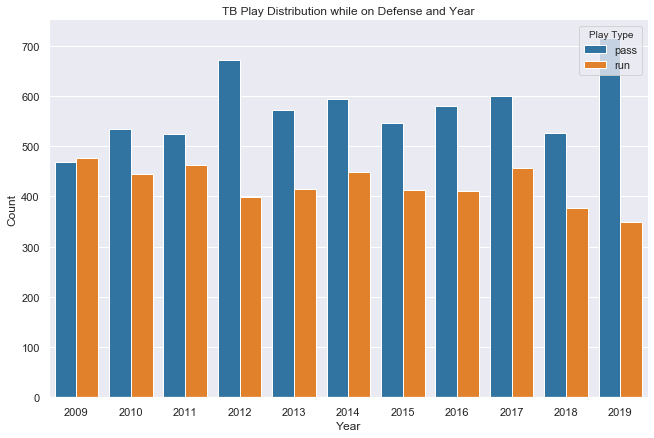

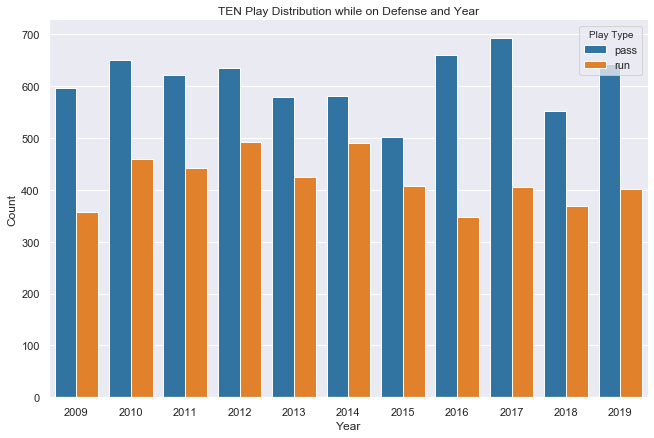

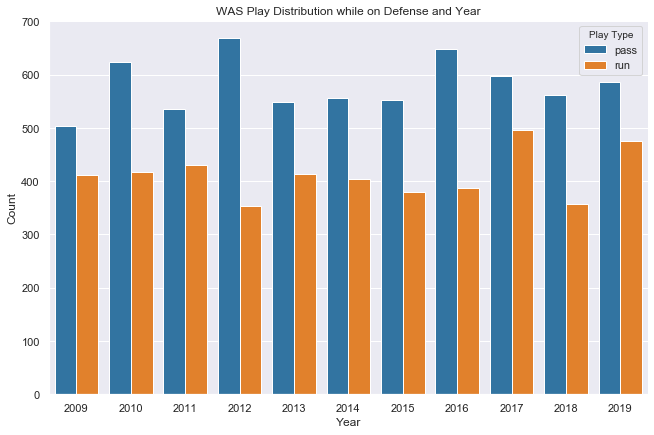

In [18]:
teams = raw_data.posteam.unique()
teams.sort()
for team in teams:
    data = raw_data[raw_data.defteam == team]
    sns.catplot(x='year', hue = 'play_type',kind = 'count', hue_order = ['pass','run'], data = data, height = 6, aspect = 1.5, legend = False)
    plt.title(team +' Play Distribution while on Defense and Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
    plt.show()

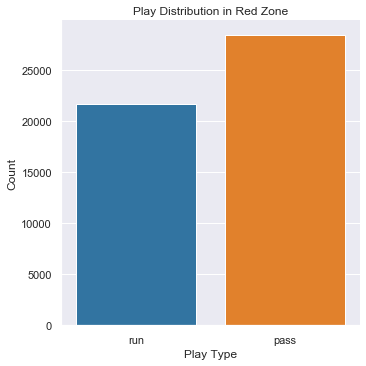

In [60]:
red_zone = raw_data[raw_data.yardline_100 >= 80]
sns.catplot(x='play_type',kind = 'count', data = red_zone)
plt.title('Play Distribution in Red Zone')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.show()

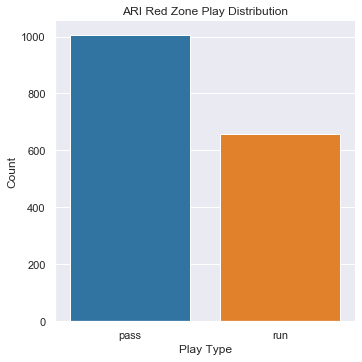

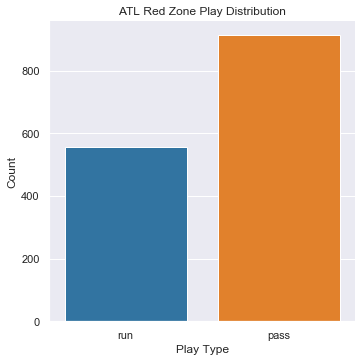

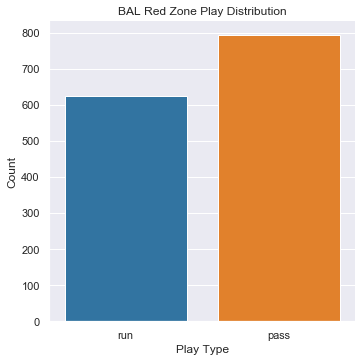

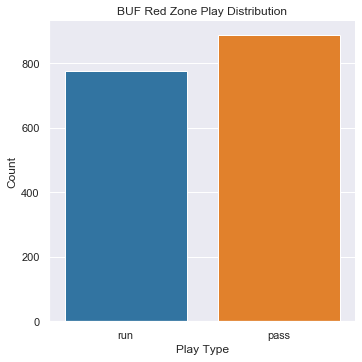

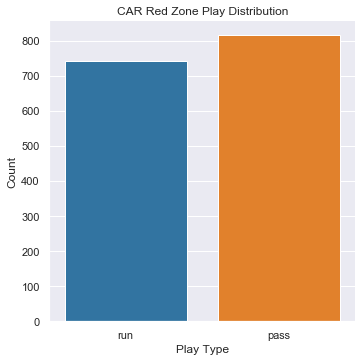

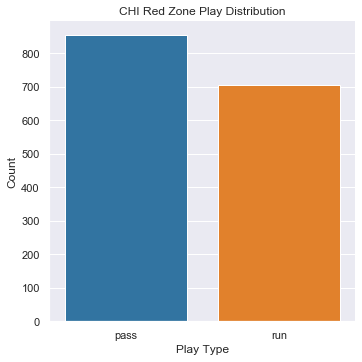

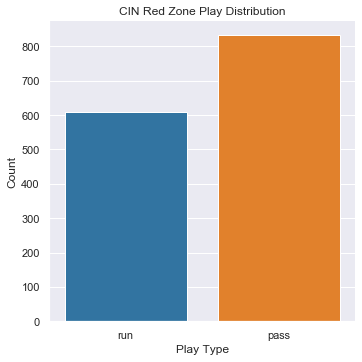

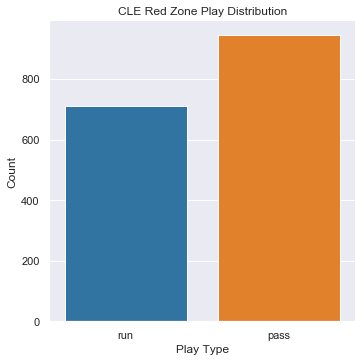

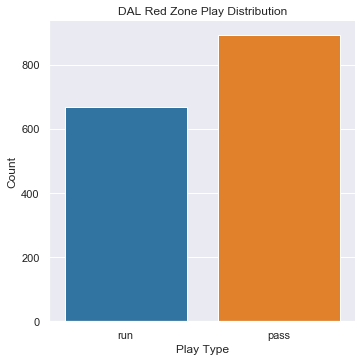

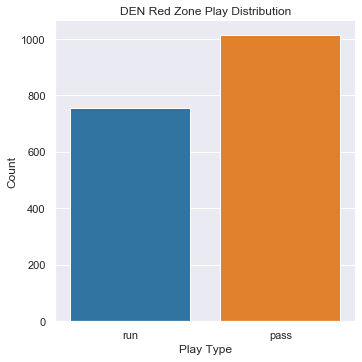

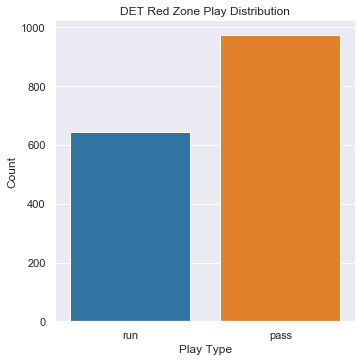

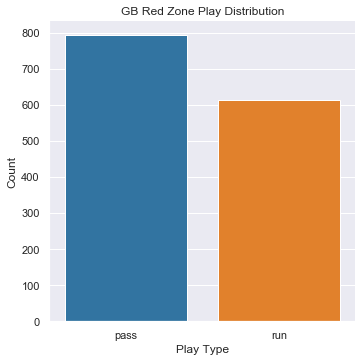

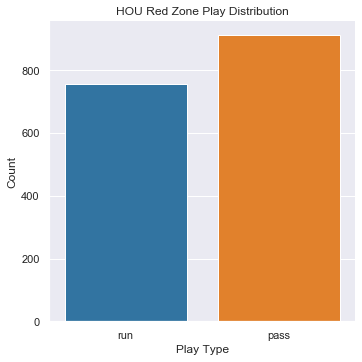

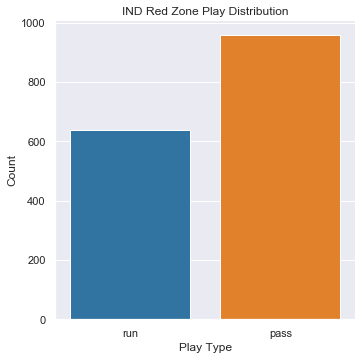

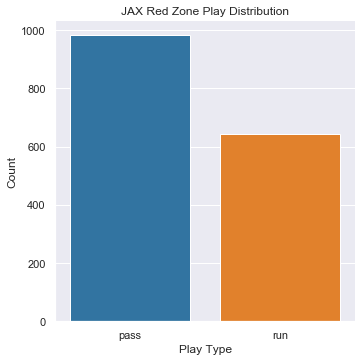

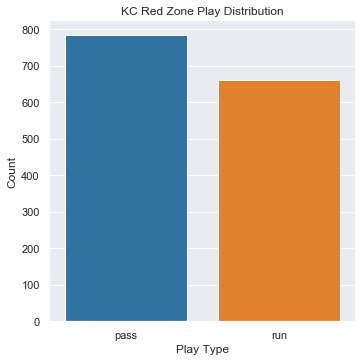

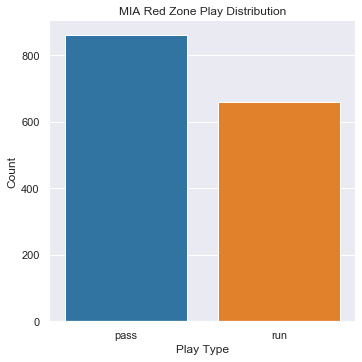

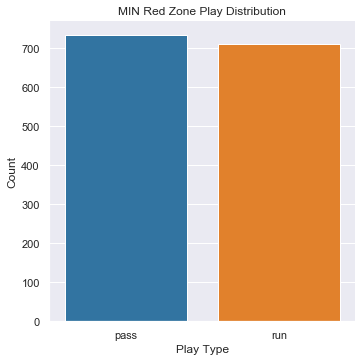

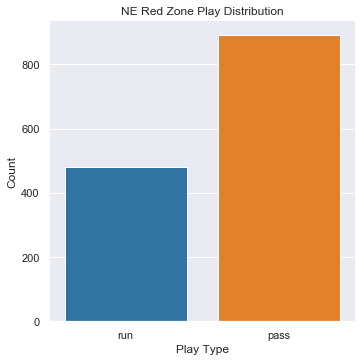

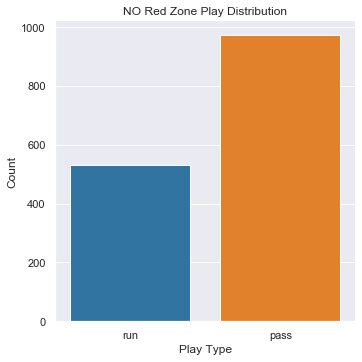

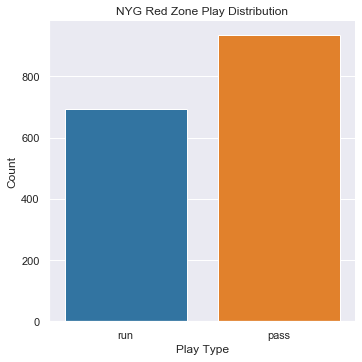

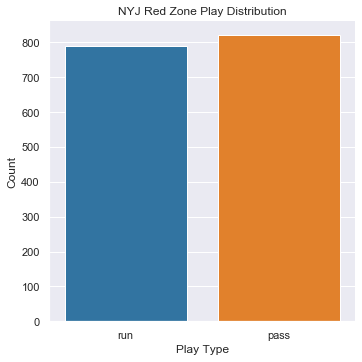

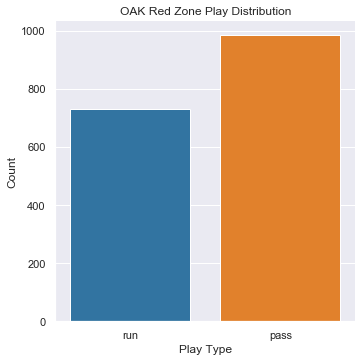

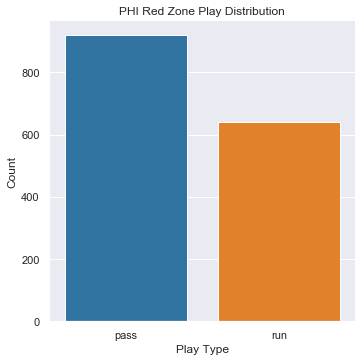

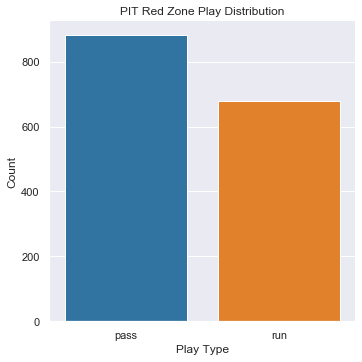

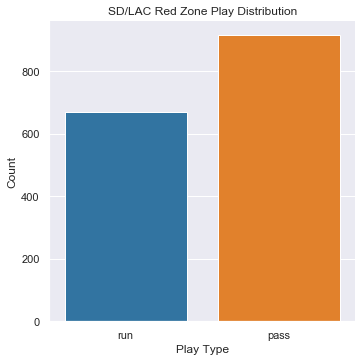

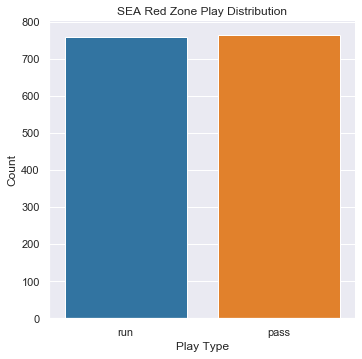

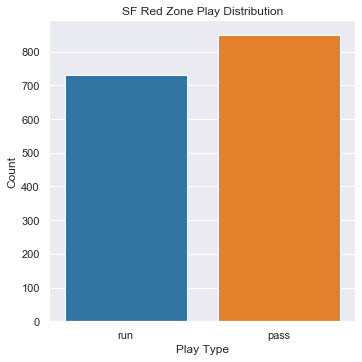

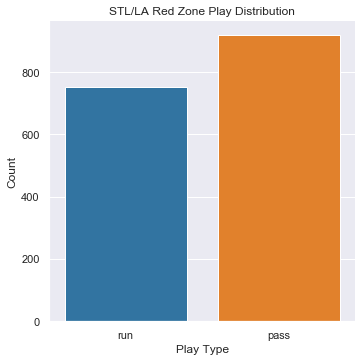

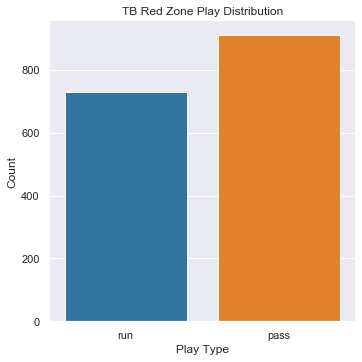

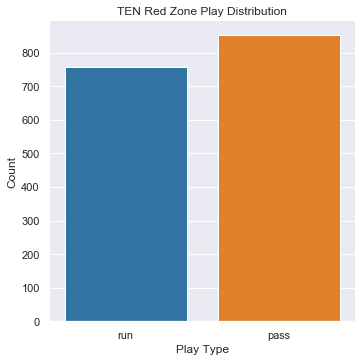

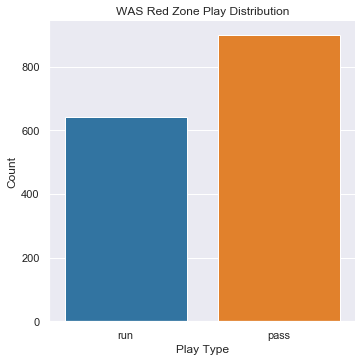

In [285]:
sns.set_context('notebook')
for team in teams:
    data = raw_data[raw_data.posteam == team]
    red_zone = data[data.yardline_100 >= 80]
    sns.catplot(x='play_type', kind = 'count', hue_order = ['pass','run'], data = red_zone, legend = False)
    plt.title(team +' Red Zone Play Distribution')
    plt.xlabel('Play Type')
    plt.ylabel('Count')
    plt.show()

# Determining Average Length of Play

In [40]:
valid_pass = pass_plays_only[pass_plays_only.yards_gained.notnull()]
valid_pass

,play_id,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,defteam_timeouts_remaining,posteam_score,defteam_score,wp,def_wp,posteam_home,side_of_field_own,scor_diff,yards_for_first_down,year
0,68,2009091000,PIT,TEN,58,2009-09-10,893,1793,3593.0,Half1,...,3,0,0,0.546433,0.453567,1,1,tied,10,2009
2,113,2009091000,PIT,TEN,56,2009-09-10,815,1715,3515.0,Half1,...,3,0,0,0.510793,0.489207,1,1,tied,7-9,2009
4,183,2009091000,TEN,PIT,98,2009-09-10,760,1660,3460.0,Half1,...,3,0,0,0.421547,0.578453,0,1,tied,10,2009
6,253,2009091000,PIT,TEN,43,2009-09-10,684,1584,3384.0,Half1,...,3,0,0,0.591489,0.408511,1,0,tied,10,2009
7,277,2009091000,PIT,TEN,40,2009-09-10,648,1548,3348.0,Half1,...,3,0,0,0.585405,0.414595,1,0,tied,7-9,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349932,3807,2019122915,SEA,SF,12,2019-12-29,46,46,46.0,Half2,...,2,21,26,0.161219,0.838781,1,0,behind_by_one_score,10,2019
349933,3877,2019122915,SEA,SF,12,2019-12-29,42,42,42.0,Half2,...,1,21,26,0.110884,0.889116,1,0,behind_by_one_score,10,2019
349934,3955,2019122915,SEA,SF,5,2019-12-29,22,22,22.0,Half2,...,1,21,26,0.235896,0.764104,1,0,behind_by_one_score,4-6,2019
349935,3977,2019122915,SEA,SF,5,2019-12-29,15,15,15.0,Half2,...,1,21,26,0.068701,0.931299,1,0,behind_by_one_score,4-6,2019


In [41]:
len(valid_pass)

205636

In [47]:
avg_pass = sum(valid_pass.yards_gained) / len(valid_pass)

In [48]:
valid_run = run_plays_only[run_plays_only.yards_gained.notnull()]
valid_run

,play_id,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,defteam_timeouts_remaining,posteam_score,defteam_score,wp,def_wp,posteam_home,side_of_field_own,scor_diff,yards_for_first_down,year
1,92,2009091000,PIT,TEN,53,2009-09-10,856,1756,3556.0,Half1,...,3,0,0,0.551088,0.448912,1,1,tied,4-6,2009
3,162,2009091000,TEN,PIT,98,2009-09-10,796,1696,3496.0,Half1,...,3,0,0,0.441071,0.558929,0,1,tied,10,2009
5,207,2009091000,TEN,PIT,94,2009-09-10,731,1631,3431.0,Half1,...,3,0,0,0.417119,0.582881,0,1,tied,4-6,2009
8,301,2009091000,PIT,TEN,30,2009-09-10,621,1521,3321.0,Half1,...,3,0,0,0.615159,0.384841,1,0,tied,10,2009
11,393,2009091000,TEN,PIT,89,2009-09-10,500,1400,3200.0,Half1,...,3,0,0,0.478927,0.521073,0,1,tied,10,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349917,3301,2019122915,SEA,SF,34,2019-12-29,296,296,296.0,Half2,...,2,14,26,0.105675,0.894325,1,0,behind_by_two_scores,10,2019
349918,3358,2019122915,SEA,SF,16,2019-12-29,257,257,257.0,Half2,...,2,14,26,0.123122,0.876878,1,0,behind_by_two_scores,10,2019
349920,3442,2019122915,SF,SEA,79,2019-12-29,215,215,215.0,Half2,...,3,26,21,0.803560,0.196440,0,1,ahead_by_one_score,10,2019
349921,3463,2019122915,SF,SEA,76,2019-12-29,172,172,172.0,Half2,...,3,26,21,0.822016,0.177984,0,1,ahead_by_one_score,7-9,2019


In [49]:
avg_run = sum(valid_run.yards_gained) / len(valid_run)

In [50]:
print('Average Yards gained for a pass: ', avg_pass)
print('Average Yards gained for a run: ', avg_run)

Average Yards gained for a pass:  6.3197689120582
Average Yards gained for a run:  4.411865947686564


# Sample Heatmap for Football Passes

In [325]:
pass_plays_only.head()

,play_id,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,defteam_timeouts_remaining,posteam_score,defteam_score,wp,def_wp,posteam_home,side_of_field_own,scor_diff,yards_for_first_down,year
0,68,2009091000,PIT,TEN,58,2009-09-10,893,1793,3593.0,Half1,...,3,0,0,0.546433,0.453567,1,1,tied,10,2009
2,113,2009091000,PIT,TEN,56,2009-09-10,815,1715,3515.0,Half1,...,3,0,0,0.510793,0.489207,1,1,tied,7-9,2009
4,183,2009091000,TEN,PIT,98,2009-09-10,760,1660,3460.0,Half1,...,3,0,0,0.421547,0.578453,0,1,tied,10,2009
6,253,2009091000,PIT,TEN,43,2009-09-10,684,1584,3384.0,Half1,...,3,0,0,0.591489,0.408511,1,0,tied,10,2009
7,277,2009091000,PIT,TEN,40,2009-09-10,648,1548,3348.0,Half1,...,3,0,0,0.585405,0.414595,1,0,tied,7-9,2009


In [326]:
sample_game = pass_plays_only[pass_plays_only.game_id == 2009091000]
sample_game

,play_id,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,defteam_timeouts_remaining,posteam_score,defteam_score,wp,def_wp,posteam_home,side_of_field_own,scor_diff,yards_for_first_down,year
0,68,2009091000,PIT,TEN,58,2009-09-10,893,1793,3593.0,Half1,...,3,0,0,0.546433,0.453567,1,1,tied,10,2009
2,113,2009091000,PIT,TEN,56,2009-09-10,815,1715,3515.0,Half1,...,3,0,0,0.510793,0.489207,1,1,tied,7-9,2009
4,183,2009091000,TEN,PIT,98,2009-09-10,760,1660,3460.0,Half1,...,3,0,0,0.421547,0.578453,0,1,tied,10,2009
6,253,2009091000,PIT,TEN,43,2009-09-10,684,1584,3384.0,Half1,...,3,0,0,0.591489,0.408511,1,0,tied,10,2009
7,277,2009091000,PIT,TEN,40,2009-09-10,648,1548,3348.0,Half1,...,3,0,0,0.585405,0.414595,1,0,tied,7-9,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,4065,2009091000,PIT,TEN,67,2009-09-10,870,870,870.0,Overtime,...,2,10,10,0.639180,0.360820,1,1,tied,10,2009
127,4135,2009091000,PIT,TEN,56,2009-09-10,765,765,765.0,Overtime,...,2,10,10,0.668586,0.331414,1,1,tied,7-9,2009
128,4159,2009091000,PIT,TEN,48,2009-09-10,722,722,722.0,Overtime,...,2,10,10,0.737421,0.262579,1,0,tied,0-3,2009
129,4183,2009091000,PIT,TEN,37,2009-09-10,681,681,681.0,Overtime,...,2,10,10,0.824886,0.175114,1,0,tied,10,2009


In [327]:
sample_game_pit = sample_game[sample_game.posteam == 'PIT']
sample_game_pit

,play_id,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,defteam_timeouts_remaining,posteam_score,defteam_score,wp,def_wp,posteam_home,side_of_field_own,scor_diff,yards_for_first_down,year
0,68,2009091000,PIT,TEN,58,2009-09-10,893,1793,3593.0,Half1,...,3,0,0,0.546433,0.453567,1,1,tied,10,2009
2,113,2009091000,PIT,TEN,56,2009-09-10,815,1715,3515.0,Half1,...,3,0,0,0.510793,0.489207,1,1,tied,7-9,2009
6,253,2009091000,PIT,TEN,43,2009-09-10,684,1584,3384.0,Half1,...,3,0,0,0.591489,0.408511,1,0,tied,10,2009
7,277,2009091000,PIT,TEN,40,2009-09-10,648,1548,3348.0,Half1,...,3,0,0,0.585405,0.414595,1,0,tied,7-9,2009
9,322,2009091000,PIT,TEN,31,2009-09-10,583,1483,3283.0,Half1,...,3,0,0,0.597822,0.402178,1,0,tied,11-15,2009
10,346,2009091000,PIT,TEN,22,2009-09-10,541,1441,3241.0,Half1,...,3,0,0,0.607521,0.392479,1,0,tied,0-3,2009
18,584,2009091000,PIT,TEN,70,2009-09-10,327,1227,3027.0,Half1,...,3,0,0,0.491891,0.508109,1,1,tied,7-9,2009
27,842,2009091000,PIT,TEN,76,2009-09-10,12,912,2712.0,Half1,...,3,0,0,0.456089,0.543911,1,1,tied,7-9,2009
33,1017,2009091000,PIT,TEN,95,2009-09-10,784,784,2584.0,Half1,...,3,0,0,0.447645,0.552355,1,1,tied,10,2009
35,1062,2009091000,PIT,TEN,87,2009-09-10,699,699,2499.0,Half1,...,3,0,0,0.454526,0.545474,1,1,tied,0-3,2009


In [328]:
sample_game_pit.air_yards.value_counts()

 0.0     8
 7.0     4
 3.0     4
-2.0     3
 5.0     3
 9.0     2
 34.0    2
 4.0     2
-1.0     2
 14.0    2
 16.0    2
 8.0     2
 22.0    1
 20.0    1
 13.0    1
 17.0    1
 12.0    1
 24.0    1
 23.0    1
 55.0    1
 6.0     1
-4.0     1
-3.0     1
Name: air_yards, dtype: int64

In [329]:
sample_game_pit[sample_game_pit.air_yards == -2.0].desc

6      (11:24) B.Roethlisberger pass short right to M...
9      (9:43) B.Roethlisberger pass short right to H....
108    (5:10) (No Huddle, Shotgun) B.Roethlisberger p...
Name: desc, dtype: object

In [330]:
sample_game_pit.pass_length.value_counts()

short       33
deep        10
no throw     4
Name: pass_length, dtype: int64

In [331]:
sample_game_pit.pass_location.value_counts()

left        19
right       14
middle      10
no throw     4
Name: pass_location, dtype: int64

In [332]:
def pass_location(yards, location):
    if location != 'no throw':
        if yards <= 5:
            return 'short'
        if yards > 5 and yards < 15:
            return 'medium'
        if yards >= 15:
            return 'deep'
    else:
        return 'sacked'

In [333]:
pass_location(15,'right')

'deep'

In [334]:
sample_game_pit['pass_distance'] = sample_game_pit.apply(lambda x: pass_location(x['air_yards'],x['pass_location']), axis = 1)

C:\Users\msf89\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [335]:
sample_game_pit.pass_distance.value_counts()

short     20
medium    13
deep      10
sacked     4
Name: pass_distance, dtype: int64

In [336]:
a = sample_game_pit[sample_game_pit.pass_distance != 'sacked']
a

,play_id,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,posteam_score,defteam_score,wp,def_wp,posteam_home,side_of_field_own,scor_diff,yards_for_first_down,year,pass_distance
0,68,2009091000,PIT,TEN,58,2009-09-10,893,1793,3593.0,Half1,...,0,0,0.546433,0.453567,1,1,tied,10,2009,short
2,113,2009091000,PIT,TEN,56,2009-09-10,815,1715,3515.0,Half1,...,0,0,0.510793,0.489207,1,1,tied,7-9,2009,deep
6,253,2009091000,PIT,TEN,43,2009-09-10,684,1584,3384.0,Half1,...,0,0,0.591489,0.408511,1,0,tied,10,2009,short
7,277,2009091000,PIT,TEN,40,2009-09-10,648,1548,3348.0,Half1,...,0,0,0.585405,0.414595,1,0,tied,7-9,2009,short
9,322,2009091000,PIT,TEN,31,2009-09-10,583,1483,3283.0,Half1,...,0,0,0.597822,0.402178,1,0,tied,11-15,2009,short
27,842,2009091000,PIT,TEN,76,2009-09-10,12,912,2712.0,Half1,...,0,0,0.456089,0.543911,1,1,tied,7-9,2009,deep
33,1017,2009091000,PIT,TEN,95,2009-09-10,784,784,2584.0,Half1,...,0,0,0.447645,0.552355,1,1,tied,10,2009,short
35,1062,2009091000,PIT,TEN,87,2009-09-10,699,699,2499.0,Half1,...,0,0,0.454526,0.545474,1,1,tied,0-3,2009,short
36,1086,2009091000,PIT,TEN,79,2009-09-10,659,659,2459.0,Half1,...,0,0,0.496017,0.503983,1,1,tied,10,2009,medium
38,1191,2009091000,PIT,TEN,85,2009-09-10,583,583,2383.0,Half1,...,0,0,0.461757,0.538243,1,1,tied,16+,2009,deep


In [337]:
array = [[0,0,0],
         [0,0,0],
         [0,0,0]]
print(array)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [368]:
def pass_heatmap(length,location):
    if location =='left':
        if length == 'short':
            array[2][0] += 1
        if length == 'medium':
            array[1][0] += 1
        if length == 'deep':
            array[0][0] += 1
            
    if location =='middle':
        if length == 'short':
            array[2][1] += 1
        if length == 'medium':
            array[1][1] += 1
        if length == 'deep':
            array[0][1] += 1
            
    if location == 'right':
        if length == 'short':
            array[2][2] += 1
        if length == 'medium':
            array[1][2] += 1
        if length == 'deep':
            array[0][2] += 1

In [339]:
a

,play_id,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,posteam_score,defteam_score,wp,def_wp,posteam_home,side_of_field_own,scor_diff,yards_for_first_down,year,pass_distance
0,68,2009091000,PIT,TEN,58,2009-09-10,893,1793,3593.0,Half1,...,0,0,0.546433,0.453567,1,1,tied,10,2009,short
2,113,2009091000,PIT,TEN,56,2009-09-10,815,1715,3515.0,Half1,...,0,0,0.510793,0.489207,1,1,tied,7-9,2009,deep
6,253,2009091000,PIT,TEN,43,2009-09-10,684,1584,3384.0,Half1,...,0,0,0.591489,0.408511,1,0,tied,10,2009,short
7,277,2009091000,PIT,TEN,40,2009-09-10,648,1548,3348.0,Half1,...,0,0,0.585405,0.414595,1,0,tied,7-9,2009,short
9,322,2009091000,PIT,TEN,31,2009-09-10,583,1483,3283.0,Half1,...,0,0,0.597822,0.402178,1,0,tied,11-15,2009,short
27,842,2009091000,PIT,TEN,76,2009-09-10,12,912,2712.0,Half1,...,0,0,0.456089,0.543911,1,1,tied,7-9,2009,deep
33,1017,2009091000,PIT,TEN,95,2009-09-10,784,784,2584.0,Half1,...,0,0,0.447645,0.552355,1,1,tied,10,2009,short
35,1062,2009091000,PIT,TEN,87,2009-09-10,699,699,2499.0,Half1,...,0,0,0.454526,0.545474,1,1,tied,0-3,2009,short
36,1086,2009091000,PIT,TEN,79,2009-09-10,659,659,2459.0,Half1,...,0,0,0.496017,0.503983,1,1,tied,10,2009,medium
38,1191,2009091000,PIT,TEN,85,2009-09-10,583,583,2383.0,Half1,...,0,0,0.461757,0.538243,1,1,tied,16+,2009,deep


In [340]:
a.apply(lambda x: pass_heatmap(x.pass_distance,x.pass_location), axis = 1)
#pass_heatmap(a.pass_length, a.pass_location)
print(array)

[[2, 5, 3], [8, 3, 2], [9, 2, 9]]


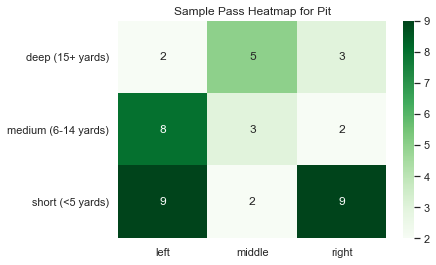

In [341]:
sns.heatmap(data = array, xticklabels = ['left','middle','right'], 
            yticklabels = ['deep (15+ yards)', 'medium (6-14 yards)', 'short (<5 yards)'], 
            annot = True, cmap= 'Greens')
plt.title('Sample Pass Heatmap for Pit')
plt.show()

# Sample Heatmap for Run Plays

In [174]:
sample_game_2 = run_plays_only[run_plays_only.game_id == 2009091000]
sample_game_2

,play_id,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,defteam_timeouts_remaining,posteam_score,defteam_score,wp,def_wp,posteam_home,side_of_field_own,scor_diff,yards_for_first_down,year
1,92,2009091000,PIT,TEN,53,2009-09-10,856,1756,3556.0,Half1,...,3,0,0,0.551088,0.448912,1,1,tied,4-6,2009
3,162,2009091000,TEN,PIT,98,2009-09-10,796,1696,3496.0,Half1,...,3,0,0,0.441071,0.558929,0,1,tied,10,2009
5,207,2009091000,TEN,PIT,94,2009-09-10,731,1631,3431.0,Half1,...,3,0,0,0.417119,0.582881,0,1,tied,4-6,2009
8,301,2009091000,PIT,TEN,30,2009-09-10,621,1521,3321.0,Half1,...,3,0,0,0.615159,0.384841,1,0,tied,10,2009
11,393,2009091000,TEN,PIT,89,2009-09-10,500,1400,3200.0,Half1,...,3,0,0,0.478927,0.521073,0,1,tied,10,2009
13,449,2009091000,TEN,PIT,22,2009-09-10,444,1344,3144.0,Half1,...,3,0,0,0.631203,0.368797,0,0,tied,10,2009
16,542,2009091000,PIT,TEN,73,2009-09-10,404,1304,3104.0,Half1,...,3,0,0,0.528421,0.471579,1,1,tied,10,2009
17,563,2009091000,PIT,TEN,72,2009-09-10,369,1269,3069.0,Half1,...,3,0,0,0.511082,0.488918,1,1,tied,7-9,2009
21,705,2009091000,TEN,PIT,60,2009-09-10,225,1125,2925.0,Half1,...,3,0,0,0.545367,0.454633,0,1,tied,4-6,2009
25,800,2009091000,PIT,TEN,79,2009-09-10,98,998,2798.0,Half1,...,3,0,0,0.496586,0.503414,1,1,tied,10,2009


In [175]:
sample_game_pit_2 = sample_game_2[sample_game_2.posteam == 'PIT']
sample_game_pit_2

,play_id,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,defteam_timeouts_remaining,posteam_score,defteam_score,wp,def_wp,posteam_home,side_of_field_own,scor_diff,yards_for_first_down,year
1,92,2009091000,PIT,TEN,53,2009-09-10,856,1756,3556.0,Half1,...,3,0,0,0.551088,0.448912,1,1,tied,4-6,2009
8,301,2009091000,PIT,TEN,30,2009-09-10,621,1521,3321.0,Half1,...,3,0,0,0.615159,0.384841,1,0,tied,10,2009
16,542,2009091000,PIT,TEN,73,2009-09-10,404,1304,3104.0,Half1,...,3,0,0,0.528421,0.471579,1,1,tied,10,2009
17,563,2009091000,PIT,TEN,72,2009-09-10,369,1269,3069.0,Half1,...,3,0,0,0.511082,0.488918,1,1,tied,7-9,2009
25,800,2009091000,PIT,TEN,79,2009-09-10,98,998,2798.0,Half1,...,3,0,0,0.496586,0.503414,1,1,tied,10,2009
26,821,2009091000,PIT,TEN,77,2009-09-10,57,957,2757.0,Half1,...,3,0,0,0.480678,0.519322,1,1,tied,7-9,2009
34,1041,2009091000,PIT,TEN,87,2009-09-10,743,743,2543.0,Half1,...,3,0,0,0.472069,0.527931,1,1,tied,0-3,2009
37,1110,2009091000,PIT,TEN,70,2009-09-10,619,619,2419.0,Half1,...,3,0,0,0.534518,0.465482,1,1,tied,0-3,2009
39,1215,2009091000,PIT,TEN,67,2009-09-10,539,539,2339.0,Half1,...,3,0,0,0.535498,0.464502,1,1,tied,10,2009
40,1236,2009091000,PIT,TEN,66,2009-09-10,498,498,2298.0,Half1,...,3,0,0,0.523406,0.476594,1,1,tied,7-9,2009


In [176]:
sample_game_pit_2.run_gap.value_counts()

guard     9
middle    6
tackle    5
end       3
Name: run_gap, dtype: int64

In [177]:
sample_game_pit_2.run_location.value_counts()

right     13
middle     6
left       4
Name: run_location, dtype: int64

In [180]:
run_array = [0,0,0,0,0,0,0]

In [196]:
def run_heatmap(location,gap):
    if location =='left':
        if gap == 'end':
            run_array[0] += 1
        if gap == 'tackle':
            run_array[1] += 1
        if gap == 'guard':
            run_array[2] += 1
            
    if location =='middle':
        run_array[3] += 1
            
    if location == 'right':
        if gap == 'end':
            run_array[6] += 1
        if gap == 'tackle':
            run_array[5] += 1
        if gap == 'guard':
            run_array[4] += 1

In [197]:
sample_game_pit_2.apply(lambda x: run_heatmap(x.run_location,x.run_gap), axis = 1)
#pass_heatmap(a.pass_length, a.pass_location)
print(run_array)

[1, 2, 1, 6, 8, 3, 2]


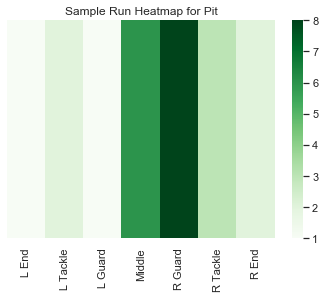

In [249]:
sns.heatmap([run_array], xticklabels=['L End', 'L Tackle', 'L Guard', 'Middle', 'R Guard', 'R Tackle', 'R End'],
           cmap= 'Greens',yticklabels = [''])
plt.title('Sample Run Heatmap for Pit')
plt.show()

# Plot Heatmaps for Entire Season

In [294]:
pit_pass_plays = pass_plays_only[pass_plays_only.posteam == 'PIT']
pit_pass_plays_2019 = pit_pass_plays[pit_pass_plays.year == '2019']
pit_pass_plays_2019

,play_id,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,defteam_timeouts_remaining,posteam_score,defteam_score,wp,def_wp,posteam_home,side_of_field_own,scor_diff,yards_for_first_down,year
319597,243,2019090812,PIT,NE,84,2019-09-08,676,1576,3376.0,Half1,...,3,0,0,0.471670,0.528330,0,1,tied,4-6,2019
319598,267,2019090812,PIT,NE,77,2019-09-08,638,1538,3338.0,Half1,...,3,0,0,0.508410,0.491590,0,1,tied,10,2019
319602,360,2019090812,PIT,NE,61,2019-09-08,487,1387,3187.0,Half1,...,3,0,0,0.516602,0.483398,0,1,tied,4-6,2019
319611,688,2019090812,PIT,NE,83,2019-09-08,215,1115,2915.0,Half1,...,3,0,7,0.238978,0.761022,0,1,behind_by_one_score,16+,2019
319612,748,2019090812,PIT,NE,85,2019-09-08,185,1085,2885.0,Half1,...,3,0,7,0.205653,0.794347,0,1,behind_by_one_score,16+,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349421,2924,2019122900,PIT,BAL,50,2019-12-29,695,695,695.0,Half2,...,3,10,19,0.248648,0.751352,0,0,behind_by_two_scores,4-6,2019
349431,3314,2019122900,PIT,BAL,81,2019-12-29,294,294,294.0,Half2,...,2,10,19,0.125348,0.874652,0,1,behind_by_two_scores,10,2019
349432,3336,2019122900,PIT,BAL,81,2019-12-29,290,290,290.0,Half2,...,2,10,19,0.112447,0.887553,0,1,behind_by_two_scores,10,2019
349433,3358,2019122900,PIT,BAL,81,2019-12-29,286,286,286.0,Half2,...,2,10,19,0.098254,0.901746,0,1,behind_by_two_scores,10,2019


In [367]:
game_ids = list(pit_pass_plays_2019.game_id.unique())
game_ids

[2019090812,
 2019091507,
 2019092212,
 2019093000,
 2019100607,
 2019101311,
 2019102800,
 2019110306,
 2019111009,
 2019111400,
 2019112403,
 2019120110,
 2019120810,
 2019121506,
 2019122209,
 2019122900]

In [406]:
def pass_heatmap(length,location, array):
    if location =='left':
        if length == 'short':
            array[2][0] += 1
        if length == 'medium':
            array[1][0] += 1
        if length == 'deep':
            array[0][0] += 1
            
    if location =='middle':
        if length == 'short':
            array[2][1] += 1
        if length == 'medium':
            array[1][1] += 1
        if length == 'deep':
            array[0][1] += 1
            
    if location == 'right':
        if length == 'short':
            array[2][2] += 1
        if length == 'medium':
            array[1][2] += 1
        if length == 'deep':
            array[0][2] += 1

In [396]:
array = [[0,0,0],[0,0,0],[0,0,0]]

In [411]:
def plot_pass_year(team,year):
    team_pass_plays = pass_plays_only[pass_plays_only.posteam == team]
    team_pass_plays_year = team_pass_plays[team_pass_plays.year == year]
    game_ids = list(team_pass_plays_year.game_id.unique())
    
    for game in game_ids:
        array = [[0,0,0],[0,0,0],[0,0,0]]
        game_of_week = team_pass_plays[team_pass_plays.game_id == game]
        opponent = game_of_week.defteam.unique()
        game_of_week['pass_distance'] = game_of_week.apply(lambda x: pass_location(x['air_yards'],x['pass_location']), axis = 1)
        non_sacked_plays = game_of_week[game_of_week.pass_distance != 'sacked']
        
        non_sacked_plays.apply(lambda x: pass_heatmap(x.pass_distance,x.pass_location,array), axis = 1)
       # Plot results
        sns.heatmap(data = array, xticklabels = ['left','middle','right'], 
        yticklabels = ['deep (15+ yards)', 'medium (6-14 yards)', 'short (<5 yards)'], 
        annot = True, cmap= 'Greens')
        plt.title('Pass Heatmap Against ' + opponent)
        plt.show()

C:\Users\msf89\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


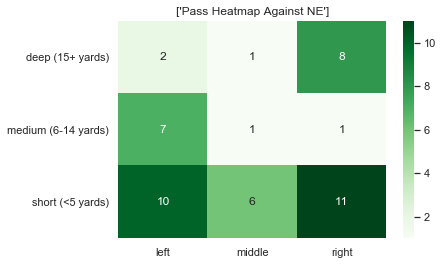

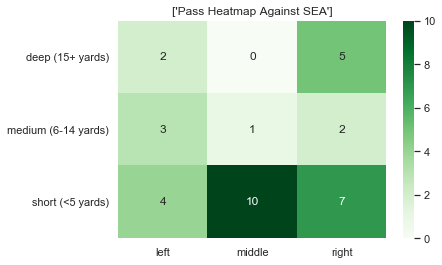

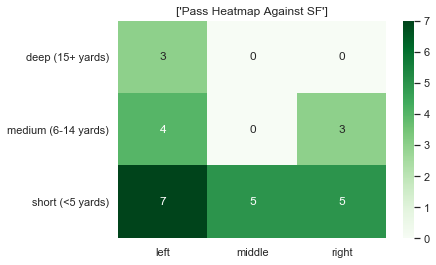

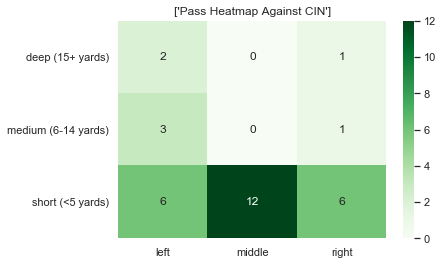

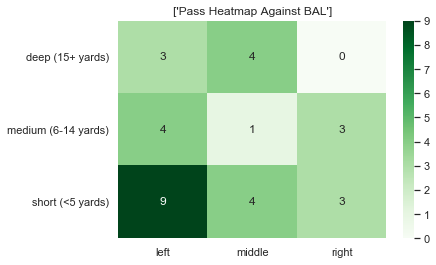

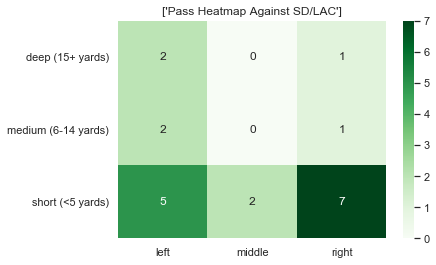

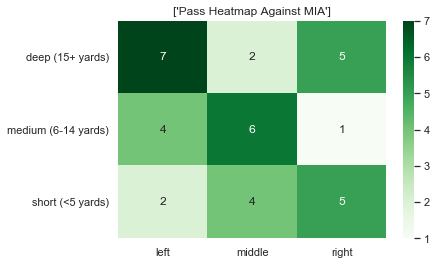

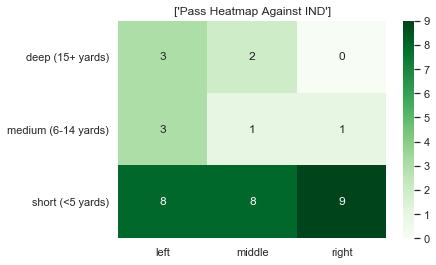

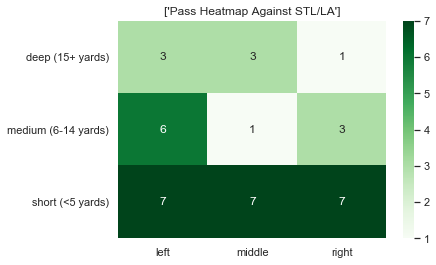

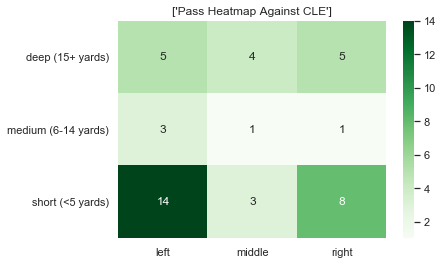

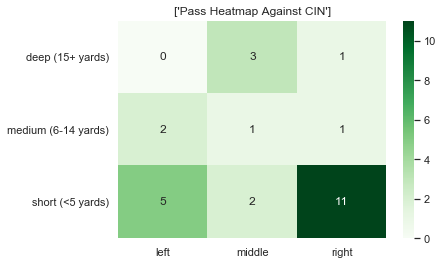

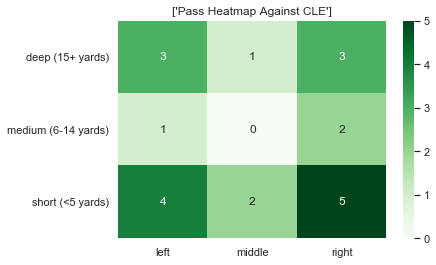

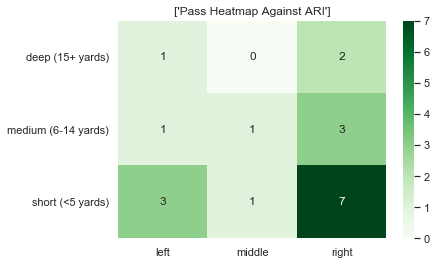

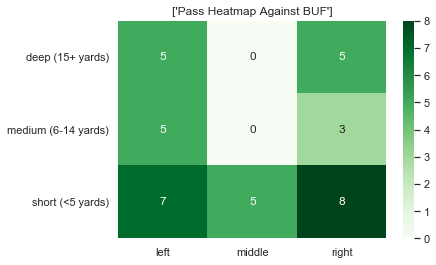

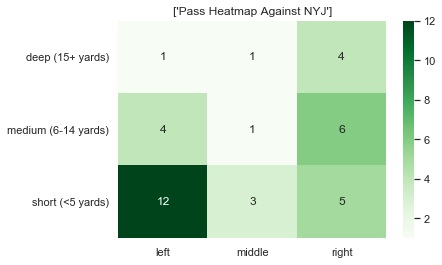

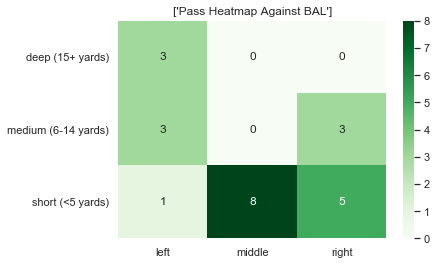

In [412]:
plot_pass_year('PIT', '2019')

In [413]:
def run_heatmap(location,gap,run_array):
    if location =='left':
        if gap == 'end':
            run_array[0] += 1
        if gap == 'tackle':
            run_array[1] += 1
        if gap == 'guard':
            run_array[2] += 1
            
    if location =='middle':
        run_array[3] += 1
            
    if location == 'right':
        if gap == 'end':
            run_array[6] += 1
        if gap == 'tackle':
            run_array[5] += 1
        if gap == 'guard':
            run_array[4] += 1

In [416]:
def plot_run_year(team,year):
    team_pass_plays = run_plays_only[run_plays_only.posteam == team]
    team_pass_plays_year = team_pass_plays[team_pass_plays.year == year]
    game_ids = list(team_pass_plays_year.game_id.unique())
    
    for game in game_ids:
        run_array = [0,0,0,0,0,0,0]
        game_of_week = team_pass_plays[team_pass_plays.game_id == game]
        opponent = game_of_week.defteam.unique()
        
        game_of_week.apply(lambda x: run_heatmap(x.run_location,x.run_gap,run_array), axis = 1)
       # Plot results
        sns.heatmap([run_array], xticklabels=['L End', 'L Tackle', 'L Guard', 'Middle', 'R Guard', 'R Tackle', 'R End'],
        cmap= 'Greens',yticklabels = [''])
        plt.title('Run Heatmap Against ' + opponent)
        plt.show()
        
        

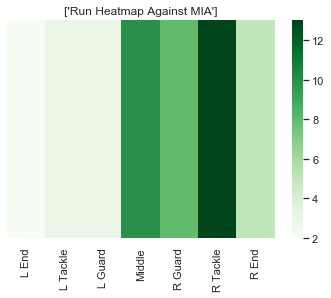

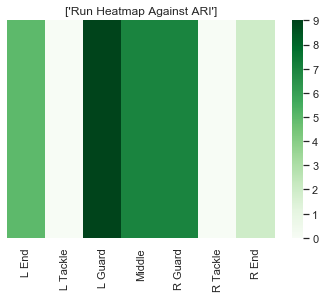

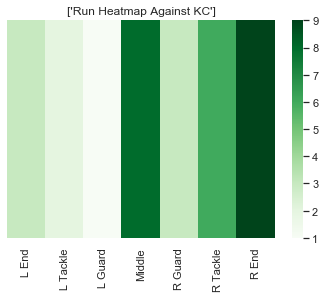

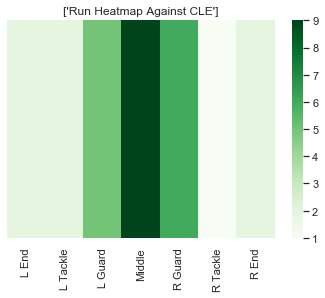

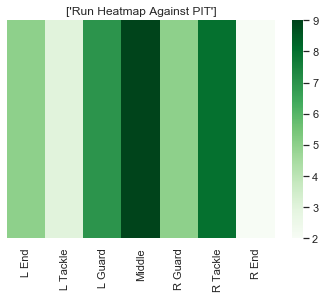

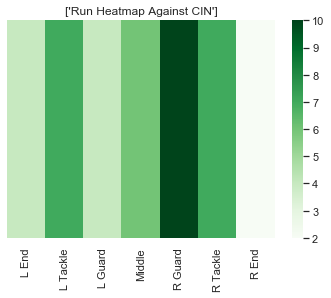

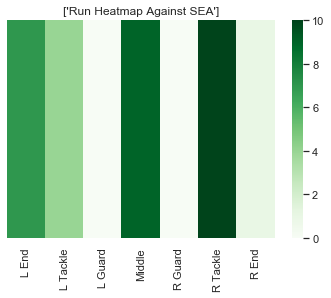

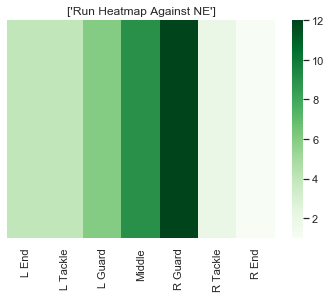

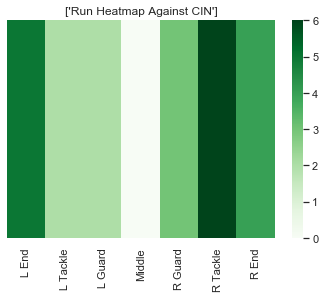

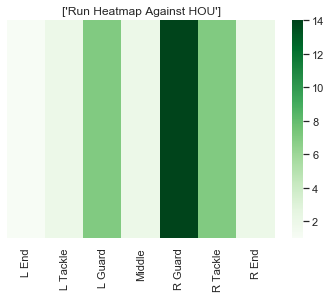

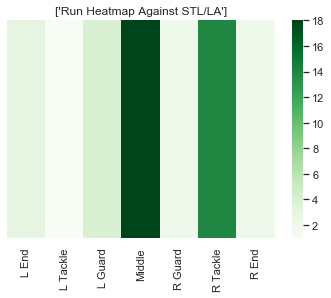

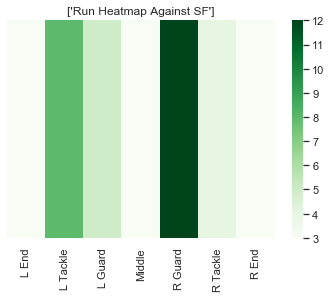

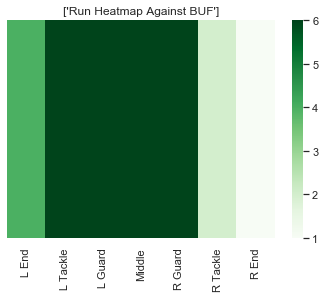

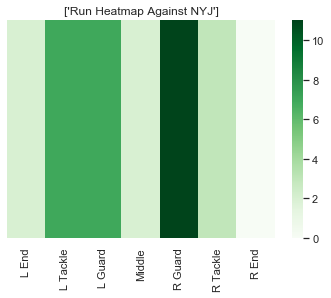

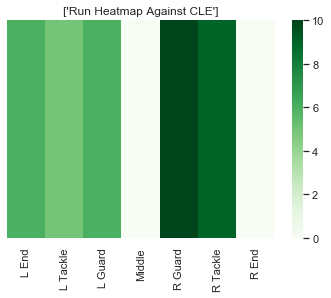

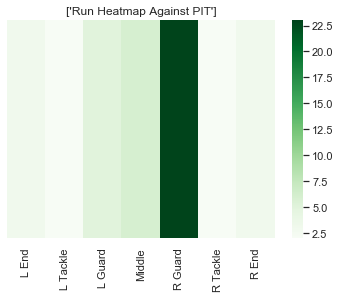

In [418]:
plot_run_year('BAL','2019')

# Helper Functions

In [ ]:
def quarter_plays_season(team,year):
    team_pass_plays = run_plays_only[run_plays_only.posteam == team]
    team_pass_plays_year = team_pass_plays[team_pass_plays.year == year]
    game_ids = list(team_pass_plays_year.game_id.unique())
    for game in game_ids:

In [419]:
def plot_pass_and_run(team, year):
    plot_pass_year(team,year)
    plot_run_year(team,year)

C:\Users\msf89\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


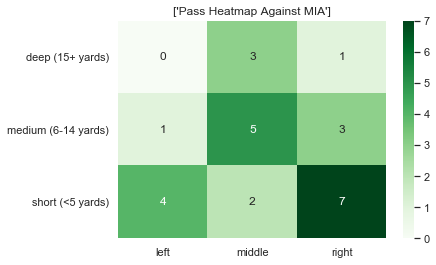

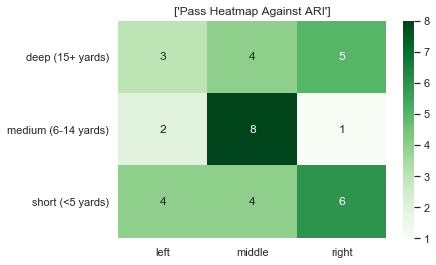

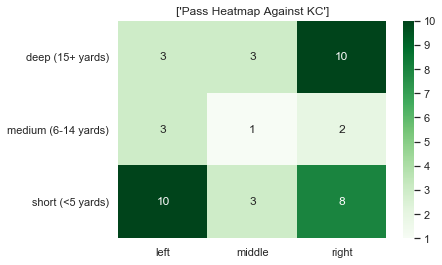

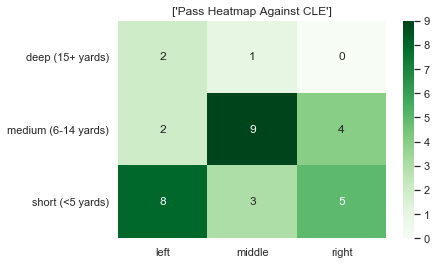

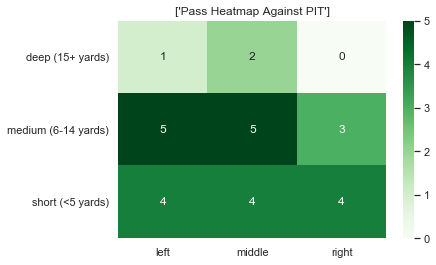

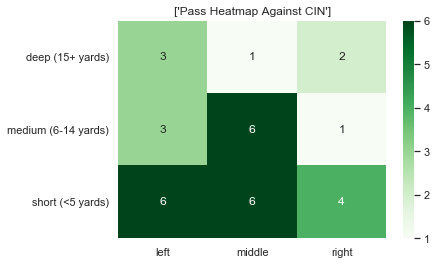

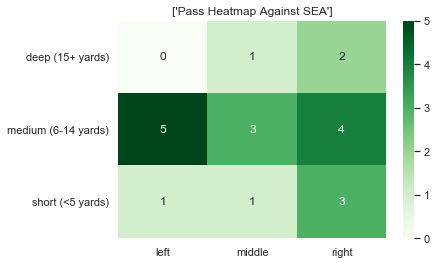

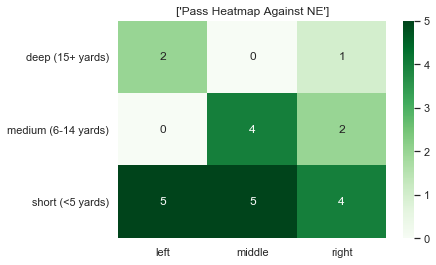

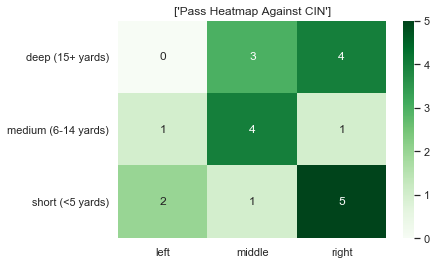

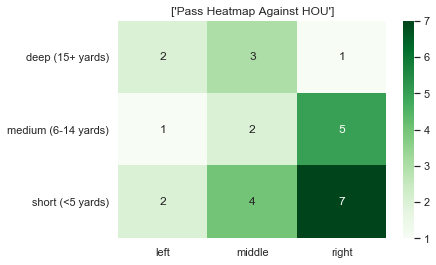

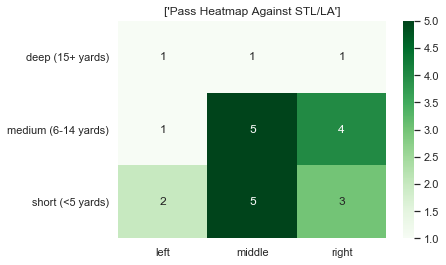

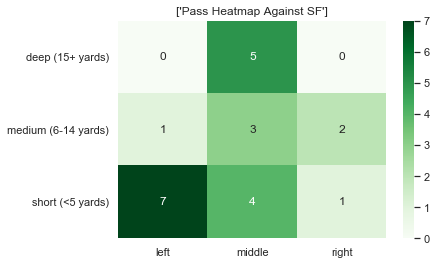

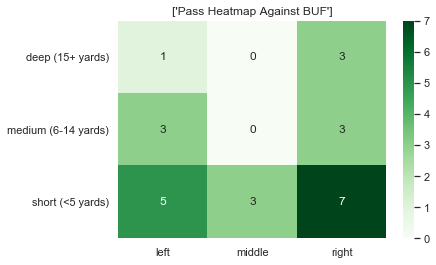

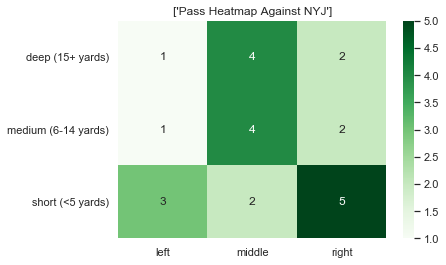

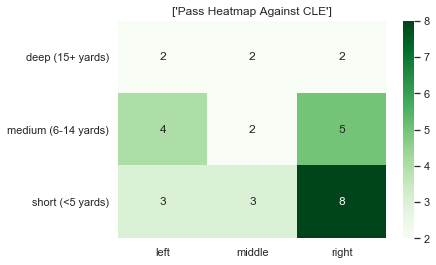

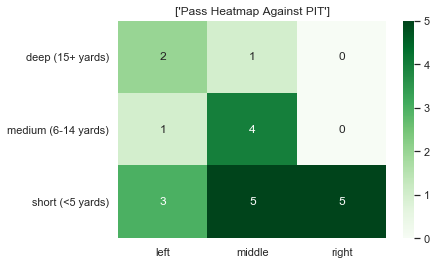

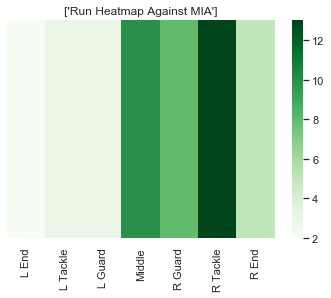

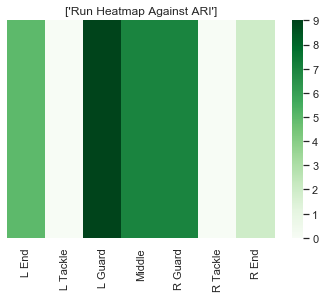

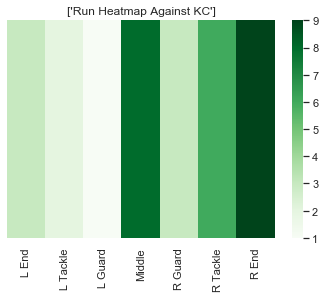

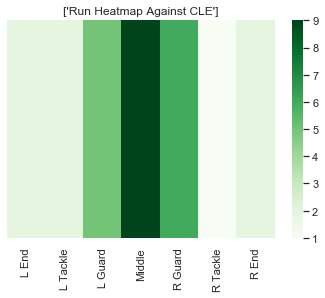

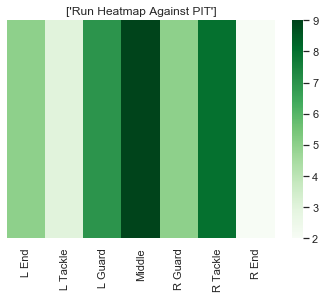

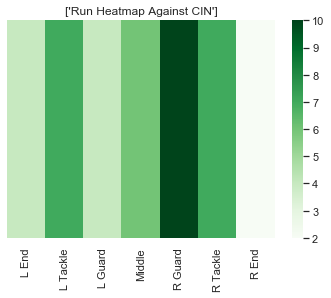

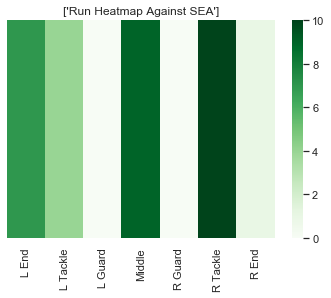

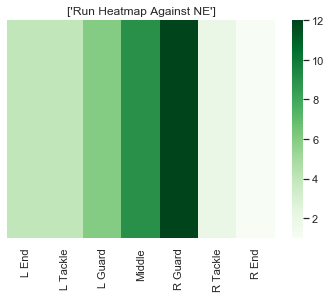

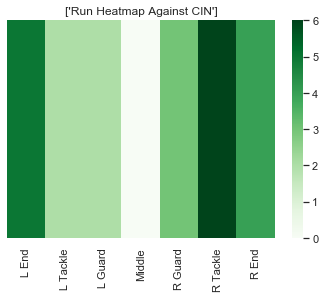

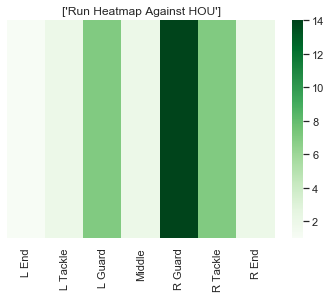

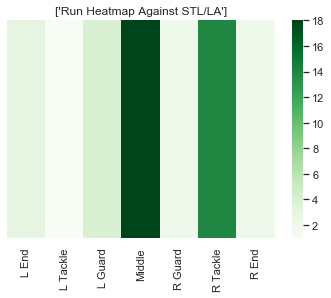

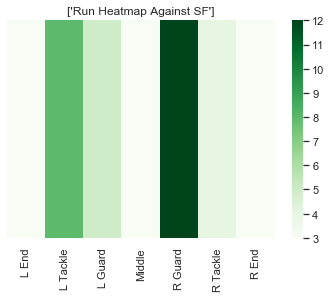

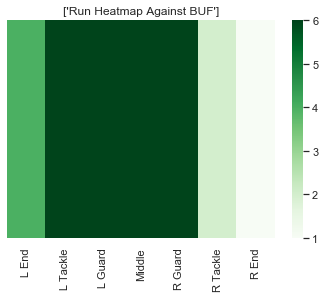

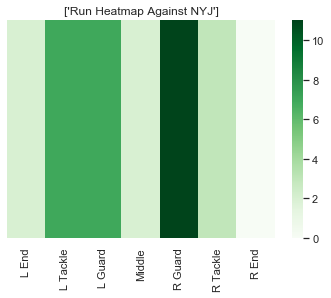

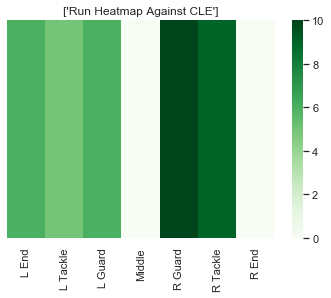

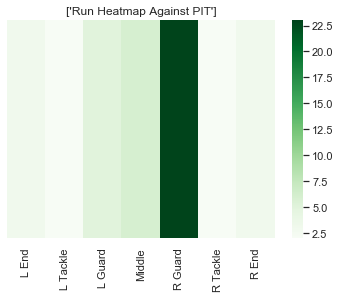

In [421]:
plot_pass_and_run('BAL', '2019')

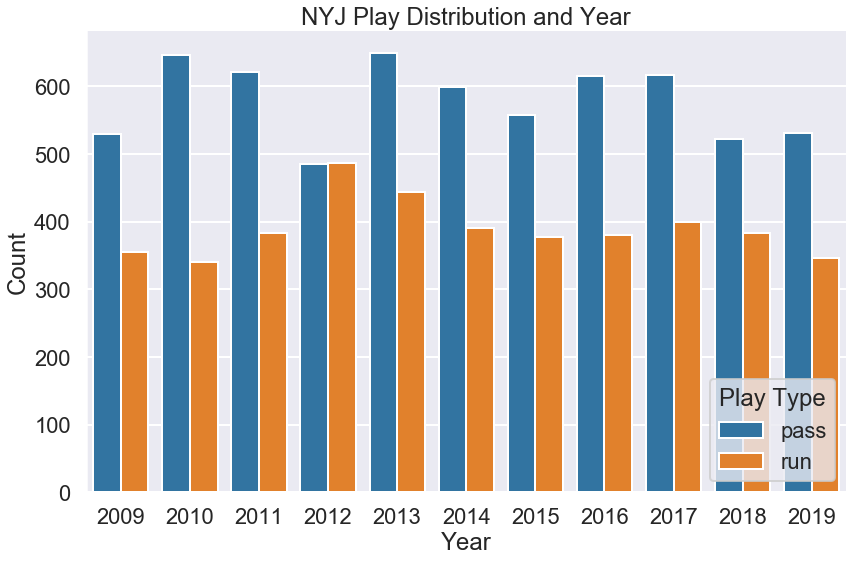

In [449]:
    nyj_data = raw_data[raw_data.posteam == 'NYJ']
    sns.catplot(x='year', hue = 'play_type',kind = 'count', hue_order = ['pass','run'], data = data, height = 8, aspect = 1.5, legend = False)
    plt.title('NYJ Play Distribution and Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title = 'Play Type', fancybox = True, loc = 'lower right')
    plt.show()

C:\Users\msf89\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


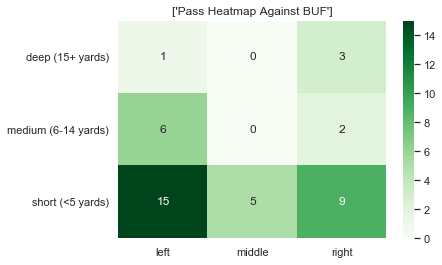

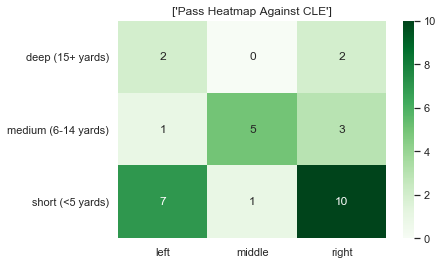

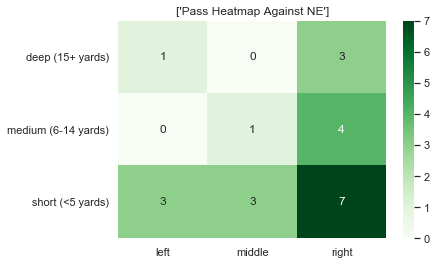

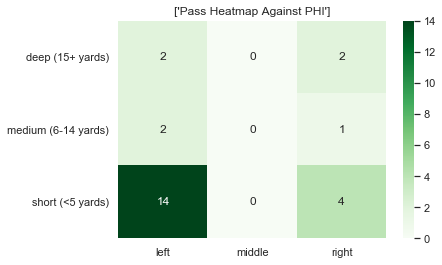

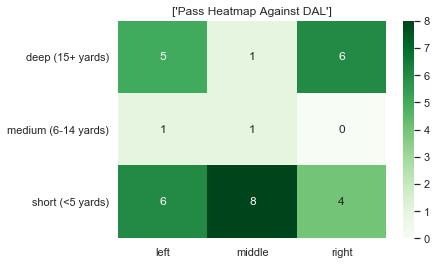

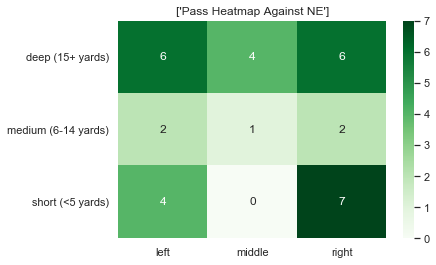

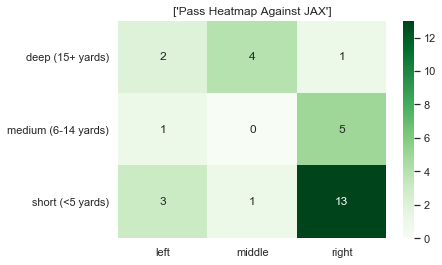

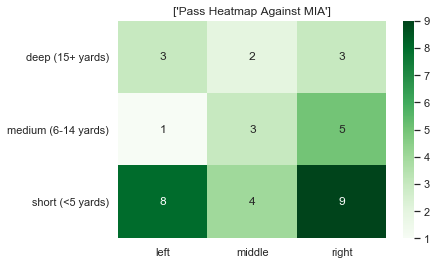

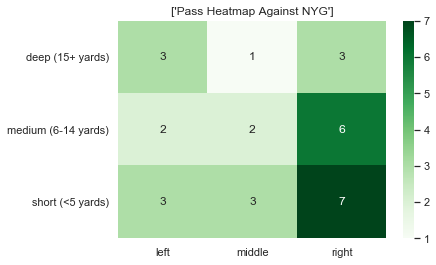

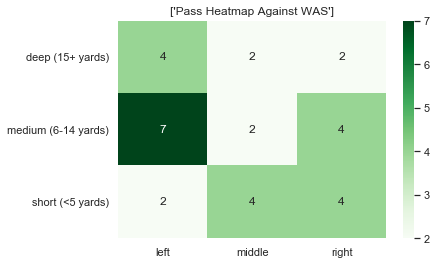

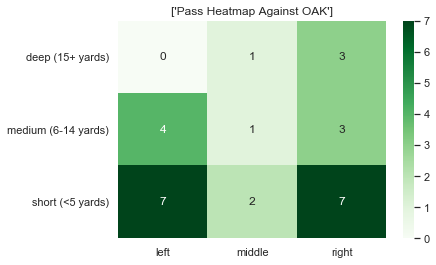

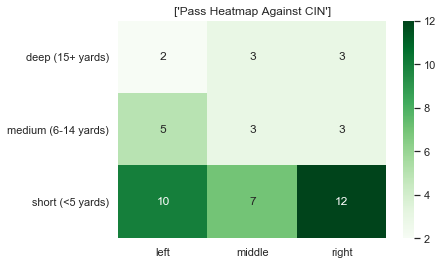

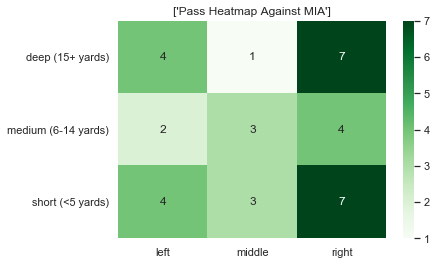

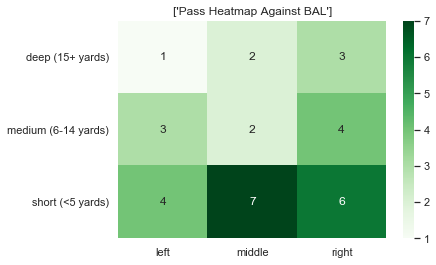

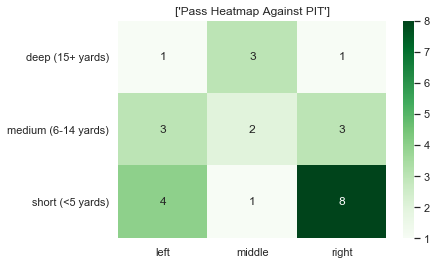

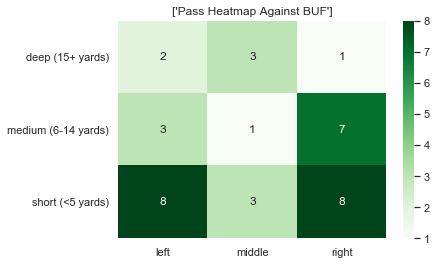

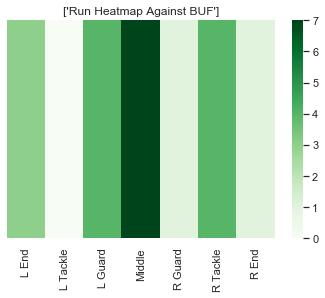

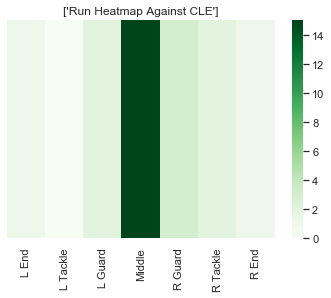

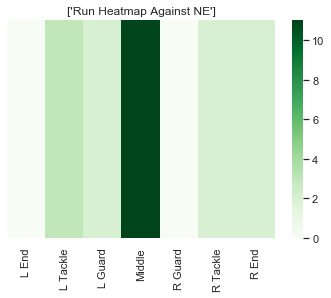

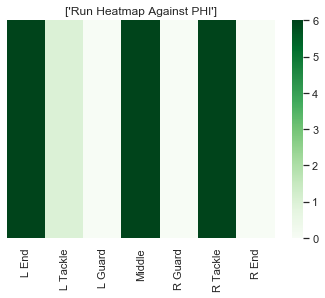

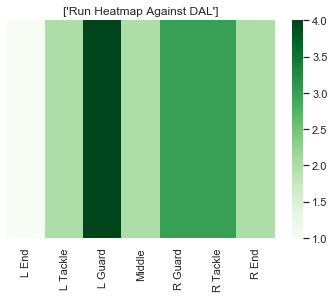

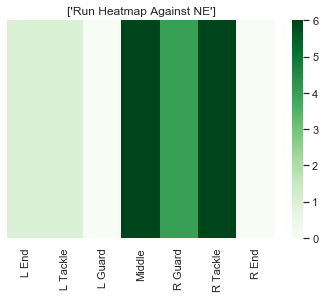

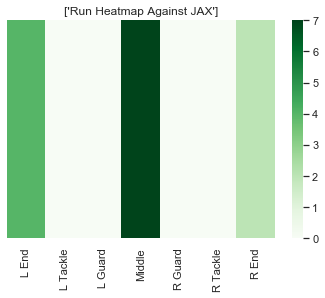

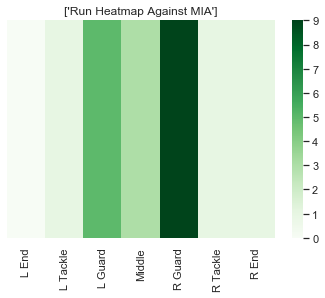

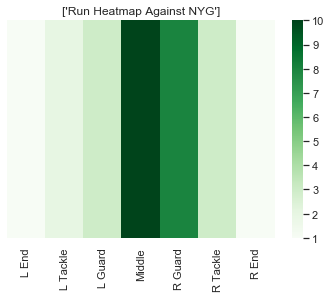

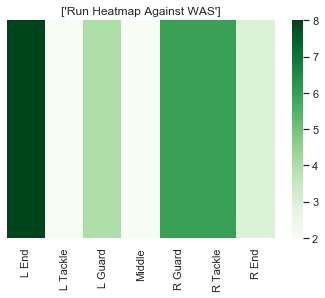

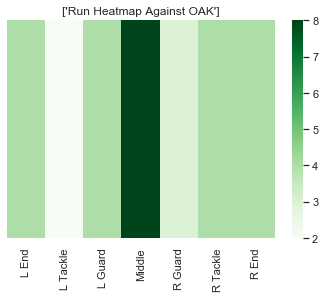

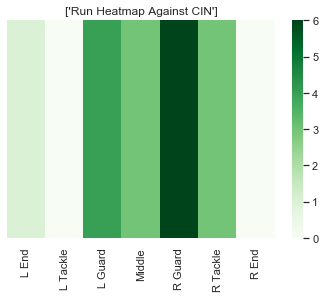

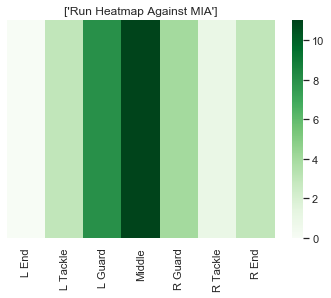

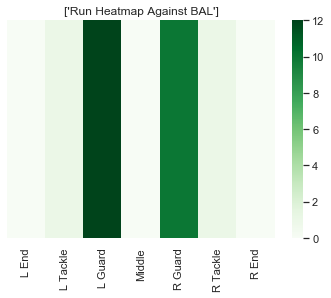

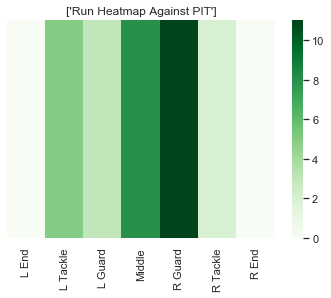

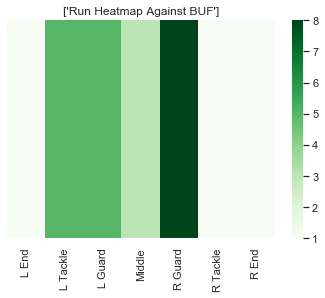

In [451]:
sns.set_context('notebook')
plot_pass_and_run('NYJ', '2019')